# Tourism in Iran (Province based)




## Amirali Shahriary

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

In [3]:
ds = pd.read_csv('/kaggle/input/iran-province-tourism/tourism.csv') 

In [6]:
shp = gpd.read_file('/kaggle/input/iran-province-shp/iran.shp') # shp file read for geometry data.

# Note:

This dataset is related to the provinces of Iran and the number of tourist attractions in each province. These tourist attractions include the type of climate, historical monuments, recreational sports, beaches, works registered in UNESCO, etc., which are presented in the following introduction and explanation of these parameters.


"Regarding the columns in which the number is mentioned, it should be said that actually there are more than this number for each province that may not be recognized as tourism or that place may not be for tourism purposes. This number is for each province, the column only includes active cases and tourist destinations. For example, there are more than 600 churches in Iran, but only historical churches are considered in this dataset."

"About the works registered in UNESCO, it can be said that Iran has a total of 26 registered works, 3 of which are:

Iranian gardens which include 9 gardens in different provinces.

in september 2023 iranian carvansarai also added to the UNESCO world heritage that is not in this CSV file.


# About Data set:

Regarding the non-numerical columns, it can be said that there are provinces that may have this parameter, but this parameter is not related to tourism or tourist and recreational destinations, or that this place is unknown and has not been introduced for tourism.

Introduction of columns and parameters:
1 - province :name of the province

2 – climate: Climate type

3 – Location: Geographic location

4 – ecotourism: The number of ecotourism residences

5 – Caravanserai: The number of active and visitable caravanserais

6 – Museum: The number of active and visitable museums

7 – Historical mosque: Many historic mosques can be visited

8 – Church: Number of historical and visitable churches

9 – Castle: The number of historical castles that can be visited

10 – Lake: The number of permanent and important lakes

11 – waterfall: Number of important and tourist waterfalls

12 – River: The number of permanent and accessible rivers for tourism

13 – dam: Number of dams available for tourism

14 – Forest

15 – desert

16 – plain

17 – mountainous

18 - Sea

19 – port: Number of important and commercial ports

20 – Beach: Number of tourist beaches

21 – Traditional market: Number of traditional and historical markets

22 – UNESCO registration: The number of historical monuments registered in UNESCO

23 – Protected area: Number of protected areas

24 – Flight site: Number of important recreational flight sites

25 – ski slope: Number of ski slopes on snow

26 – Island: The number of islands

27 – 2015 – 2018: Average number of tourists from 2015 -2018, before the outbreak of Covid-19

28 - 2019 -2021: Average total number of tourists from 2019 - 2021, After the outbreak of Covid-19

29 – total Avg: Average total number of tourists from 2015 - 2021


In [53]:
ds.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 31 entries, 0 to 30

Data columns (total 29 columns):

 #   Column               Non-Null Count  Dtype 

---  ------               --------------  ----- 

 0   province             31 non-null     object

 1   climate              31 non-null     object

 2   Location             31 non-null     object

 3   ecotourism           31 non-null     int64 

 4   Caravanserai         31 non-null     int64 

 5   Museum               31 non-null     int64 

 6   Historical mosque    31 non-null     int64 

 7   Church               31 non-null     int64 

 8   Castle               31 non-null     int64 

 9   Lake                 31 non-null     int64 

 10  waterfall            31 non-null     int64 

 11  River                31 non-null     int64 

 12  dam                  31 non-null     int64 

 13  Forest               31 non-null     object

 14  desert               31 non-null     object

 15  plain                31 non-null     ob

In [54]:
ds.head(10)

province       climate               Location  \
0              East Azarbaijan  Four Seasons            mountainous   
1              West Azarbaijan  Four Seasons   mountainous - Forest   
2                      Ardabil  Four Seasons  mountainous -  Forest   
3                      Isfahan      tropical         desert - plain   
4                       Alborz  Four Seasons            mountainous   
5                         Ilam      tropical    mountainous - plain   
6                      Bushehr      tropical           Forest - Sea   
7                       Tehran  Four Seasons    mountainous - plain   
8  Chahar Mahaal and Bakhtiari   cold garlic   mountainous - Forest   
9               South Khorasan      tropical         desert - plain   

   ecotourism  Caravanserai  Museum  Historical mosque  Church  Castle  Lake  \
0          26            11      40                 29      46      12    10   
1          13             4      11                 14      43       5     7   
2          13             3      15                  6       0       9     1   
3         261            30      17                 69      31       6     6   
4           3             2      10                  1       0       1     3   
5          16             0      10                  1       0      14     1   
6          26             1       5                  4       1       4     2   
7          26            13     100                 36      11       5     2   
8          14             0      23                 15       1       0     4   
9          64             5      19                  5       0       7     2   

   ...  Beach  Traditional market  UNESCO registration Protected area  \
0  ...      0                   3                    4             10   
1  ...      0                   4                    1              3   
2  ...      0                   1                    1              4   
3  ...      0                   2                    7              4   
4  ...      0                   0                    0              1   
5  ...      0                   0                    0              4   
6  ...      1                   0                    0              2   
7  ...      0                   3                    1              4   
8  ...      0                   0                    0              5   
9  ...      0                   0                    3              4   

  Flight site ski slope Island 2015 - 2018  2019 - 2021      Avg  
0          No       Yes     No     4968779       254384  2611581  
1          No       Yes     No     4295306       249215  2272260  
2          No       Yes     No     2652952       174205  1413578  
3          No       Yes     No     7315176       575849  3945512  
4         Yes       Yes     No     1856702       151426  1004064  
5          No        No     No      376867       104307   240587  
6          No        No    Yes     1714376        76485  1330807  
7         Yes       Yes     No    12719863       947238  6833551  
8          No       Yes     No     1821910       135370   978640  
9          No        No     No     1792535       117877   955206  

[10 rows x 29 columns]

In [99]:
provinces = [
    'East Azarbaijan', 'West Azarbaijan', 'Ardabil', 'Isfahan', 'Alborz', 
    'Ilam', 'Bushehr', 'Tehran', 'Chahar Mahaal and Bakhtiari', 'South Khorasan', 
    'Razavi Khorasan', 'North Khorasan', 'Khuzestan', 'Zanjan', 'Semnan', 
    'Sistan and Baluchistan', 'fars', 'Qazvin', 'Qom', 'Kurdistan', 'Kerman', 
    'Kermanshah', 'Kohgiluyeh and Boyer-Ahmad', 'Golestan', 'Gilan', 'Lorestan', 
    'Mazandaran', 'Markazi', 'Hormozgan', 'Hamedan', 'Yazd'
]

categorical_columns = ['Forest', 'desert', 'plain', 'mountainous', 'Sea', 'Flight site', 'ski slope', 'Island']


attraction_categories = ['ecotourism', 'Caravanserai', 'Museum', 'Historical mosque', 'Church', 
                   'Castle', 'Lake', 'waterfall', 'River', 'dam']


tourism_factors = ['ecotourism', 'Protected area', 'mountainous', 'plain', 'desert', 'Forest', 
                   'ski slope', 'UNESCO registration', 'Castle', 'Church', 'Historical mosque', 
                   'Museum', 'Caravanserai', 'Traditional market', 'Lake', 'waterfall', 'River', 
                   'dam', 'Sea', 'port', 'Beach', 'Island']  # merged

In [6]:
ds.iloc[30]

province                         Yazd
climate                      tropical
Location               desert - plain
ecotourism                        161
Caravanserai                       32
Museum                             34
Historical mosque                  12
Church                              0
Castle                              3
Lake                                0
waterfall                           2
River                               2
dam                                 0
Forest                             No
desert                            Yes
plain                             Yes
mountainous                        No
Sea                                No
port                                0
Beach                               0
Traditional market                  0
UNESCO registration                 5
Protected area                      4
Flight site                        No
ski slope                          No
Island                             No
2015 - 2018 

# Distribution of categorical columns for each attractions:

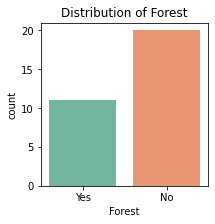

No     20

Yes    11

Name: Forest, dtype: int64 




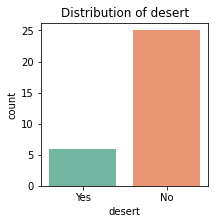

No     25

Yes     6

Name: desert, dtype: int64 




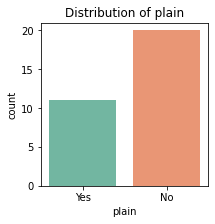

No     20

Yes    11

Name: plain, dtype: int64 




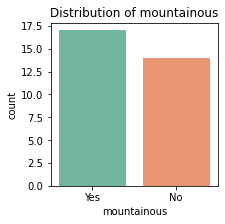

Yes    17

No     14

Name: mountainous, dtype: int64 




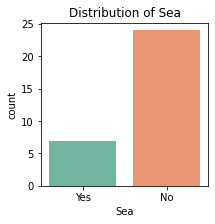

No     24

Yes     7

Name: Sea, dtype: int64 




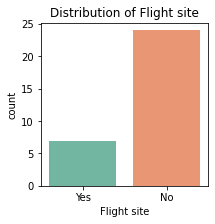

No     24

Yes     7

Name: Flight site, dtype: int64 




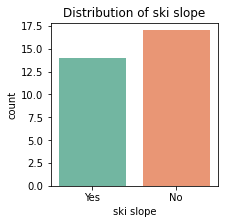

No     17

Yes    14

Name: ski slope, dtype: int64 




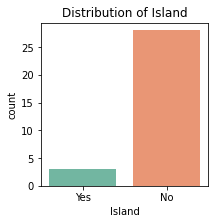

No     28

Yes     3

Name: Island, dtype: int64 




In [63]:
custom_palette = sns.color_palette("Set2")
for col in categorical_columns:
    plt.figure(figsize=(3,3))
    if col == 'mountainous':
        ordered_values = ds[col].value_counts().index  
    else:
        ordered_values = ds[col].value_counts().index[::-1]
    sns.countplot(data=ds, x=col,order=ordered_values , palette=custom_palette)
    plt.title(f'Distribution of {col}')
    plt.show()
    print(ds[col].value_counts(),'\n')  



# Distribution of number of categorical columns for each attractions:

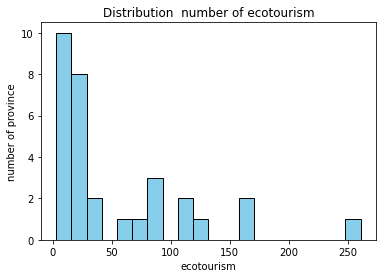

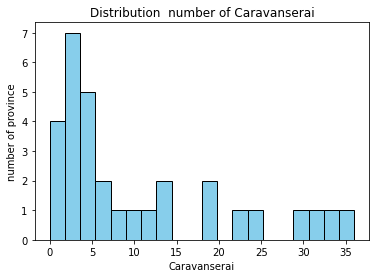

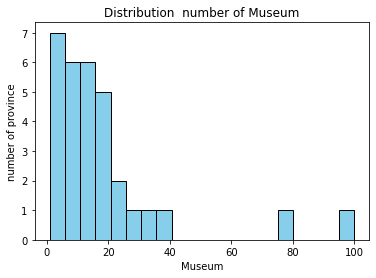

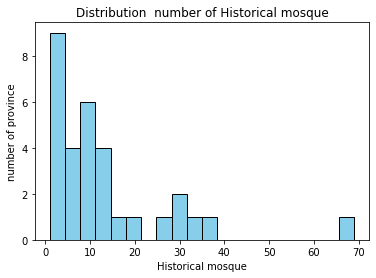

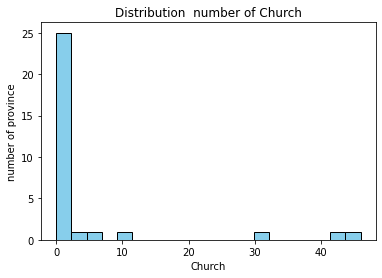

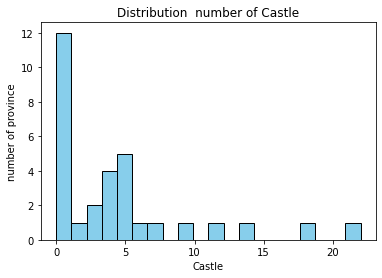

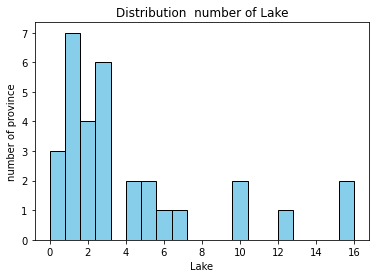

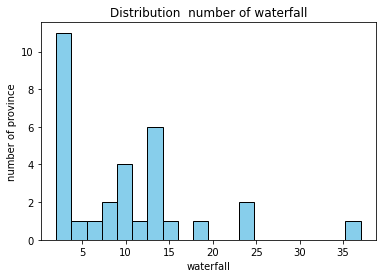

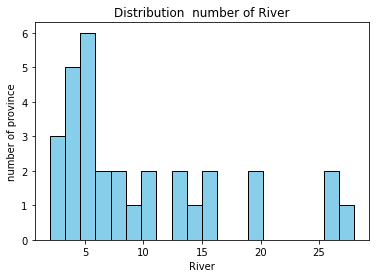

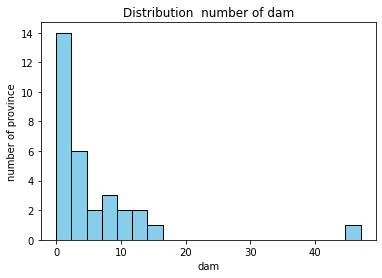

In [66]:
for col in attraction_categories:
    plt.figure()  
    plt.hist(ds[col], bins=20, color='skyblue', edgecolor='black')  
    plt.title(f'Distribution  number of {col}')
    plt.xlabel(col)
    plt.ylabel('number of province')
    plt.show()


# Number of attractions by provinces (ranking):

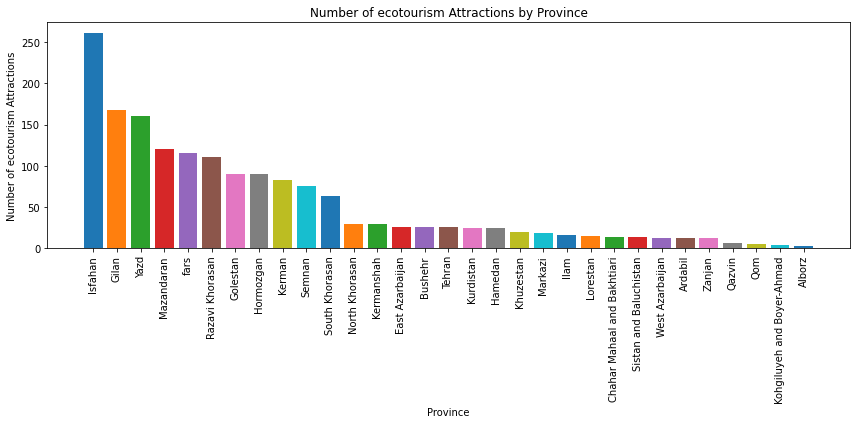

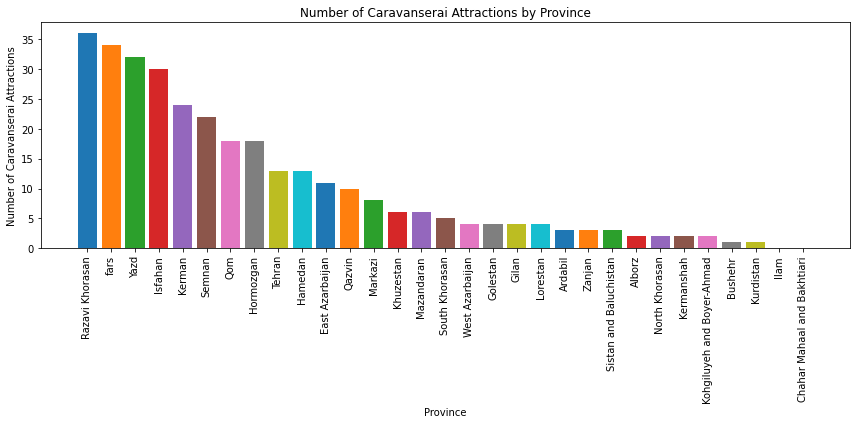

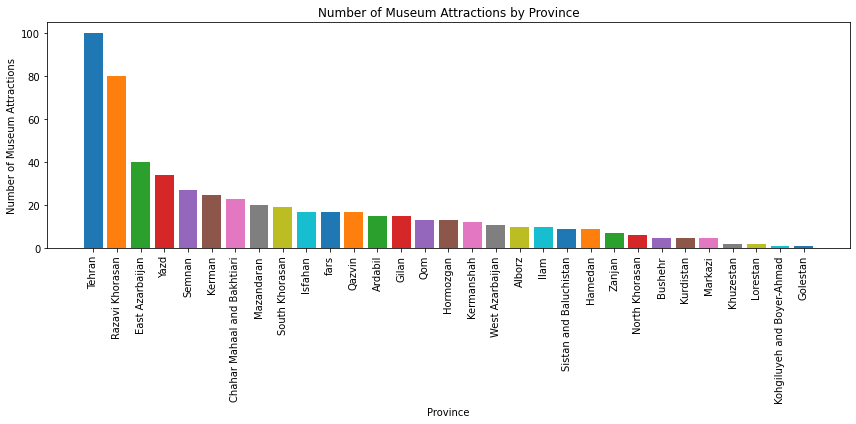

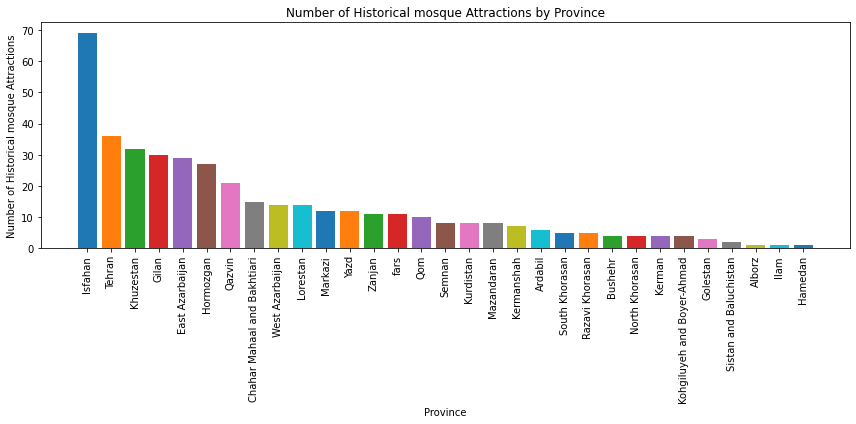

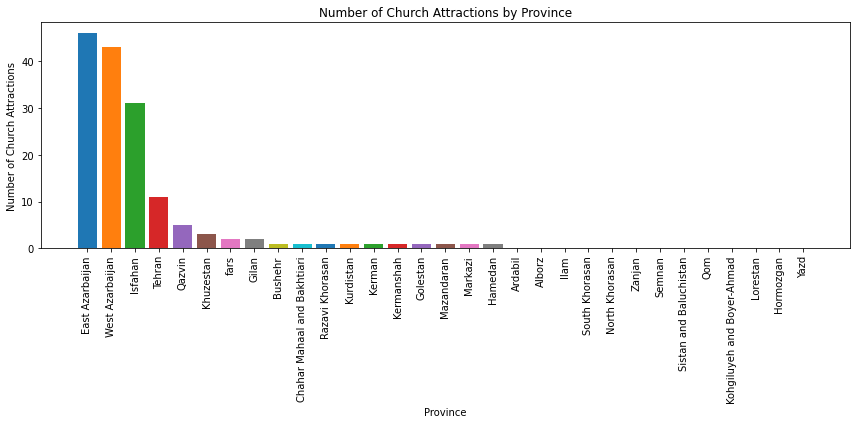

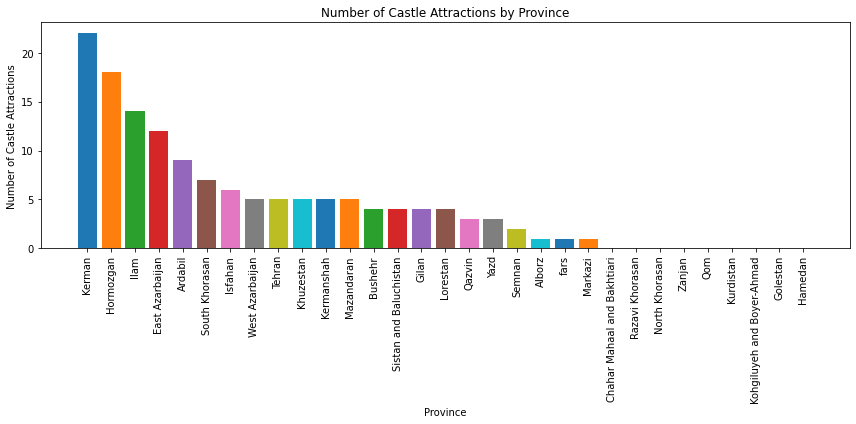

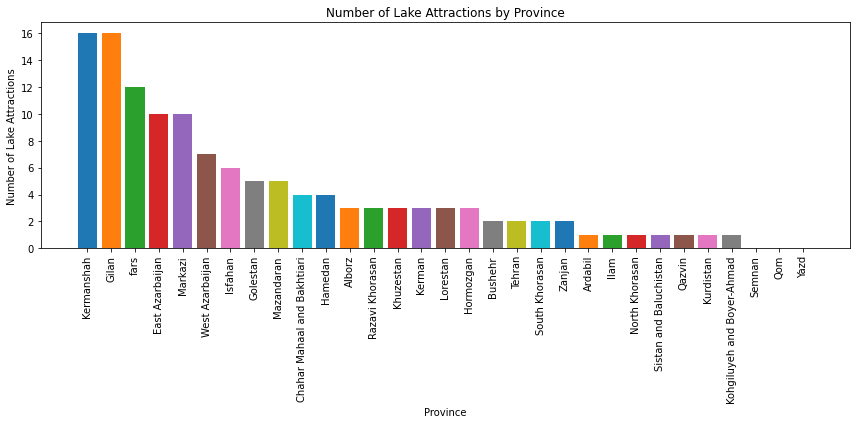

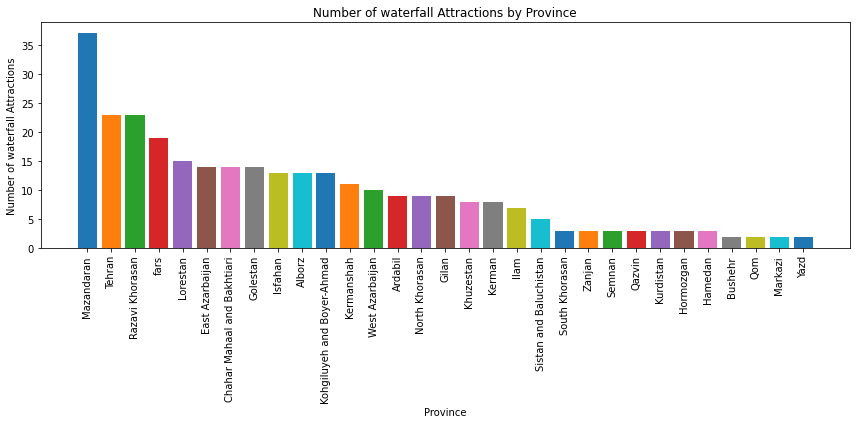

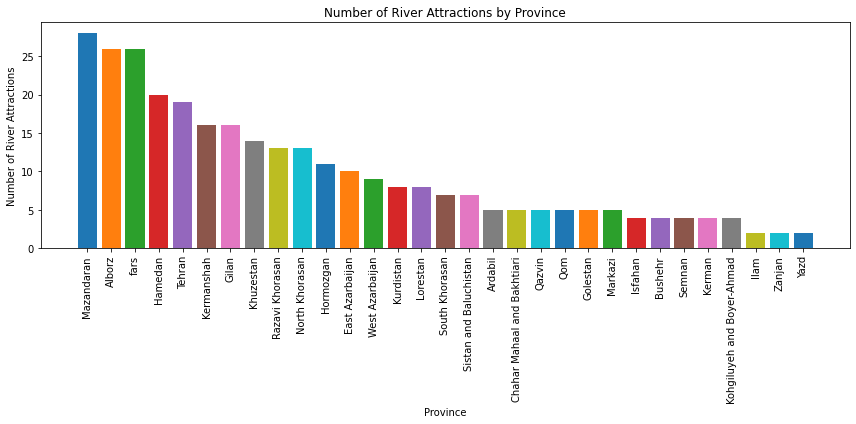

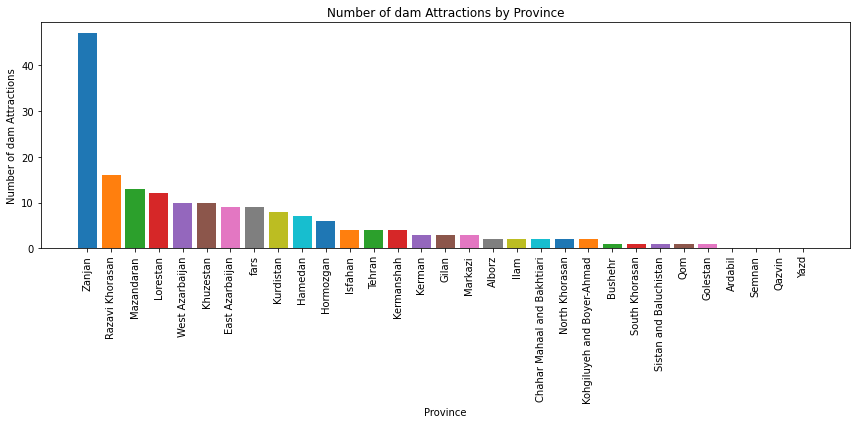

In [58]:
for category in attraction_categories:
    plt.figure(figsize=(12, 6))  
    sorted_provinces = sorted(provinces, key=lambda x: ds.loc[ds['province'] == x, category].values[0], reverse=True)
    
    for province in sorted_provinces:
        attractions_count = ds.loc[ds['province'] == province, category].values[0]
        plt.bar(province, attractions_count)
    
    plt.title(f'Number of {category} Attractions by Province')
    plt.xlabel('Province')
    plt.ylabel(f'Number of {category} Attractions')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Heat map of correlation between each factors of the csv :

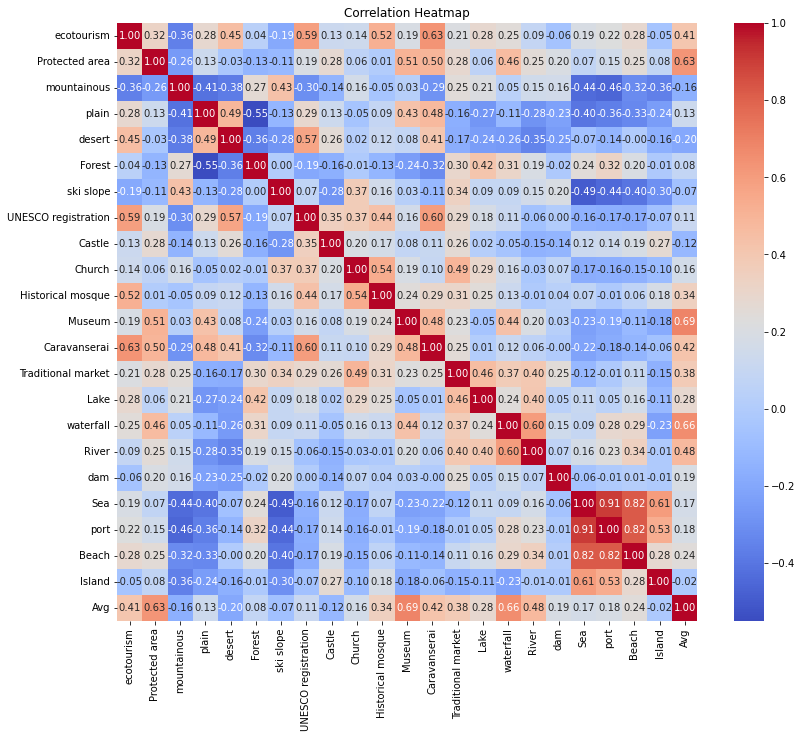

In [44]:
plt.figure(figsize=(13, 11))
sns.heatmap(ds[tourism_factors + ['Avg']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Number of Tourist Attractions by Category and Province:

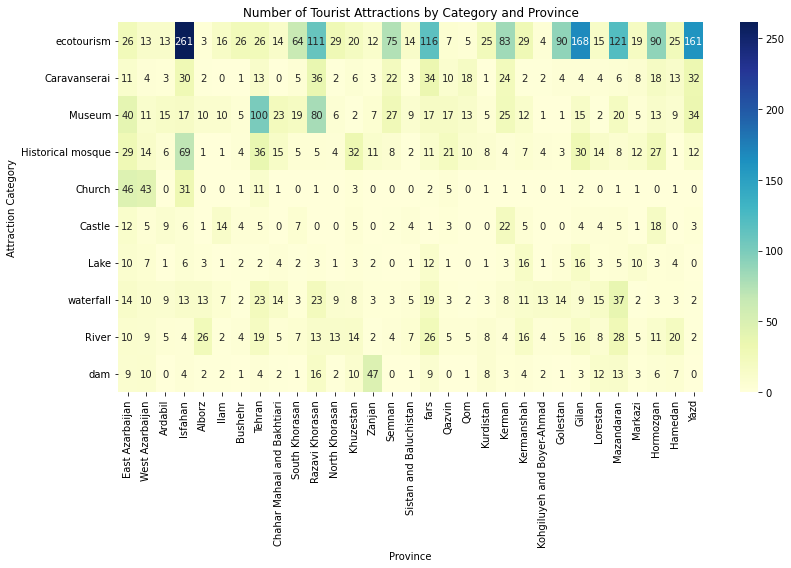

In [59]:
attraction_matrix = []

for category in attraction_categories:
    category_counts = []
    for province in provinces:
        attractions_count = ds.loc[ds['province'] == province, category].values[0]
        category_counts.append(attractions_count)
    attraction_matrix.append(category_counts)
plt.figure(figsize=(12, 8))
sns.heatmap(attraction_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=provinces, yticklabels=attraction_categories)
plt.title('Number of Tourist Attractions by Category and Province')
plt.xlabel('Province')
plt.ylabel('Attraction Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Average number  of tourist VS provinces based on the climate of each provinces:
which climate is mostly reached by tourists!

In [7]:
fig = px.bar(ds, x="province", y="Avg", color="climate", text_auto=True, 
             title='Average number of tourists vs Provinces')

fig.update_traces(marker=dict(line=dict(width=0)), selector=dict(type='bar'))
fig.update_xaxes(categoryorder='total descending')

fig.show()


# Geographical Climate of Iran (On Map):

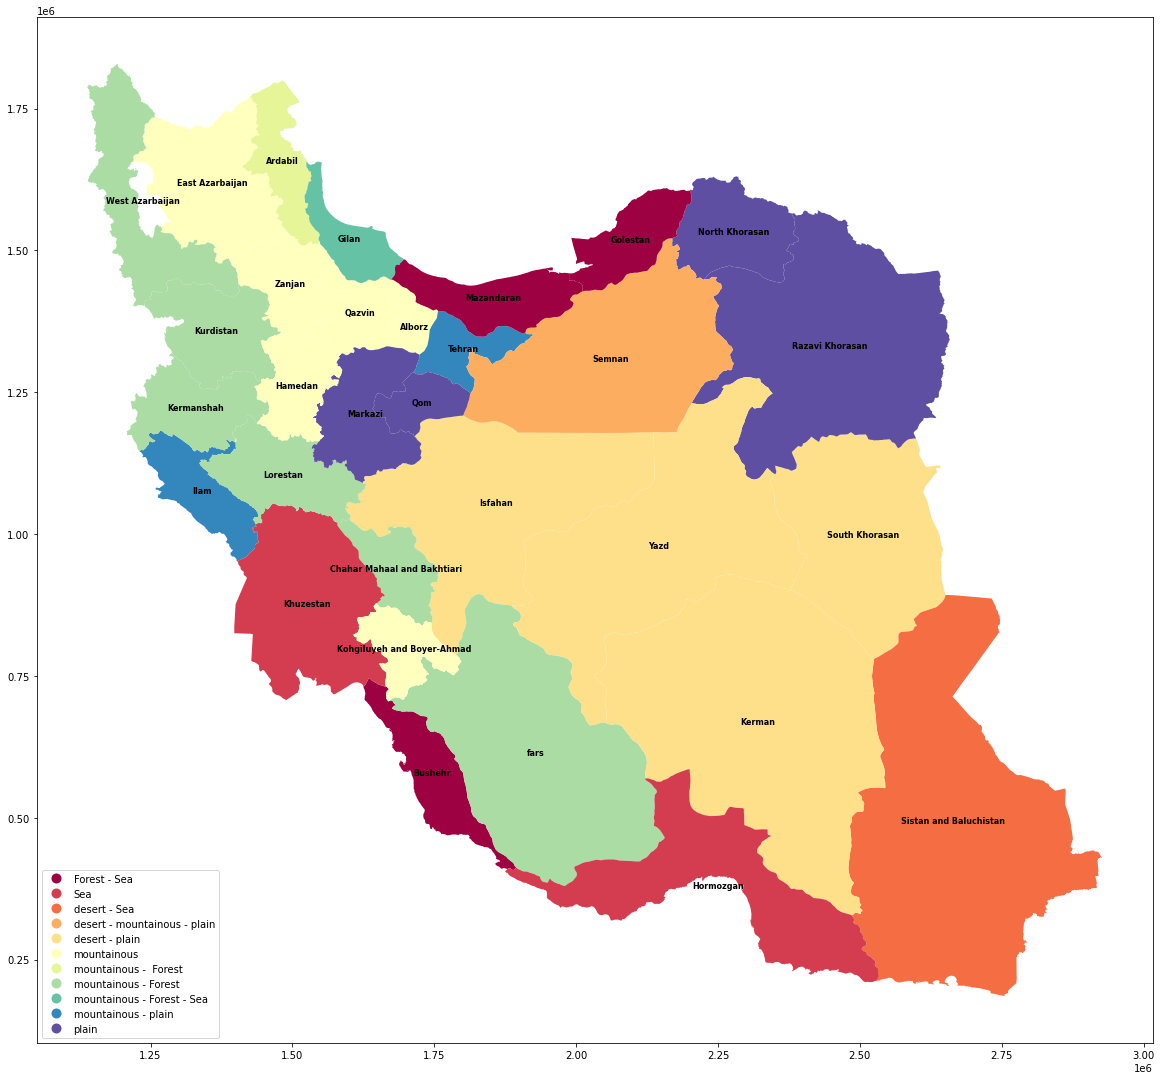

In [20]:

plot_data = merged_data[["Location","province", "geometry"]]

gdf = gpd.GeoDataFrame(data=plot_data, geometry="geometry")
gdf.plot(figsize=(20,20),column="Location", cmap='Spectral', legend=True , legend_kwds={'loc': 'lower left'})
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['province']):
    plt.text(x, y, label, fontsize=8, ha='center', va='center', color='black', weight='bold')


# Which provinces has the most decrease of the number of tourists after the Covid-19 :

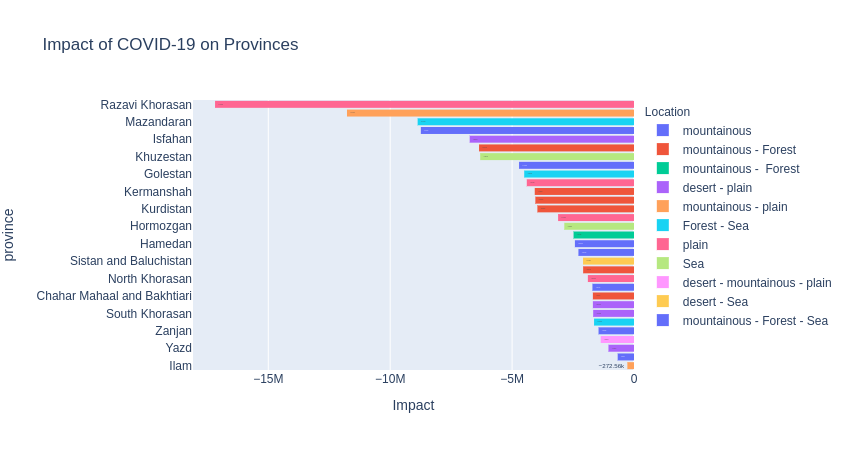

In [61]:

ds['Impact'] = ds['2019 - 2021'] - ds['2015 - 2018']

fig = px.bar(ds, y="province", x="Impact", color="Location", text_auto=True,
             title='Impact of COVID-19 on Provinces', orientation='h')
fig.update_traces(marker=dict(line=dict(width=0)), selector=dict(type='bar'))
fig.update_yaxes(categoryorder='total descending')

fig.show()


# Which provinces has the most negative impact of the Covid-19 :

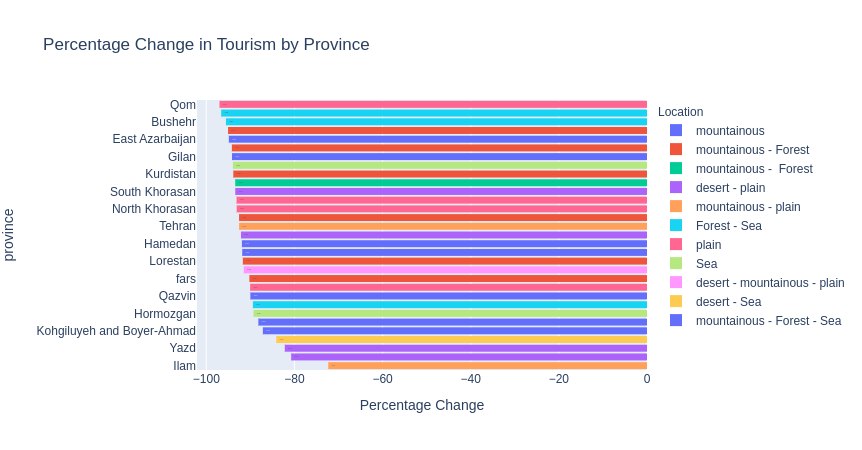

In [67]:
ds['Percentage Change'] = ((ds['2019 - 2021'] - ds['2015 - 2018']) / ds['2015 - 2018']) * 100

fig = px.bar(ds, y="province", x="Percentage Change", color="Location", text_auto=True,
             title='Percentage Change in Tourism by Province', orientation='h')
fig.update_traces(marker=dict(line=dict(width=0)), selector=dict(type='bar'))
fig.update_yaxes(categoryorder='total descending')

fig.show()


# Tourism potential of each province:

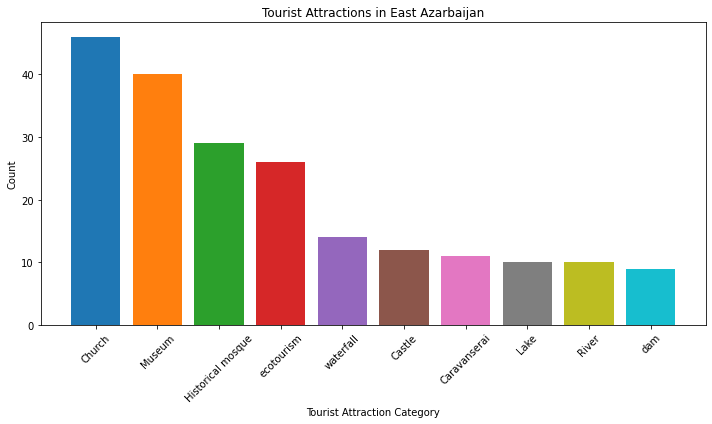

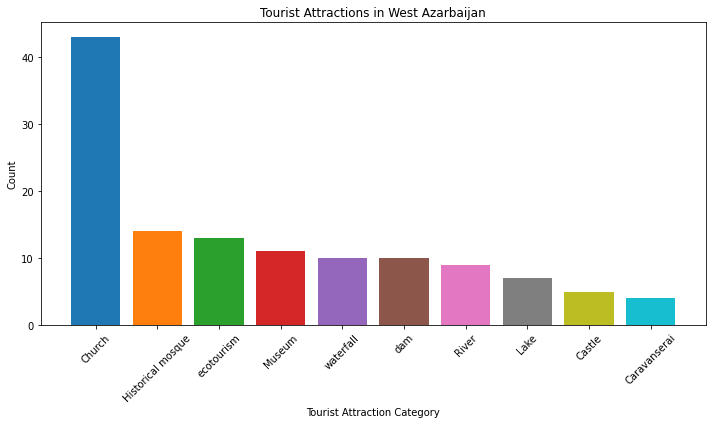

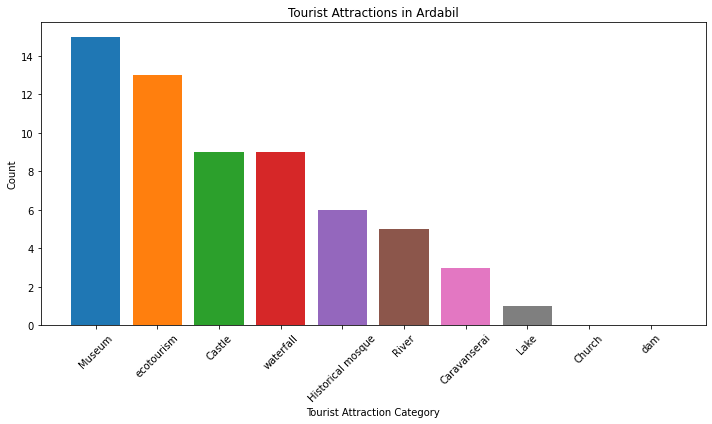

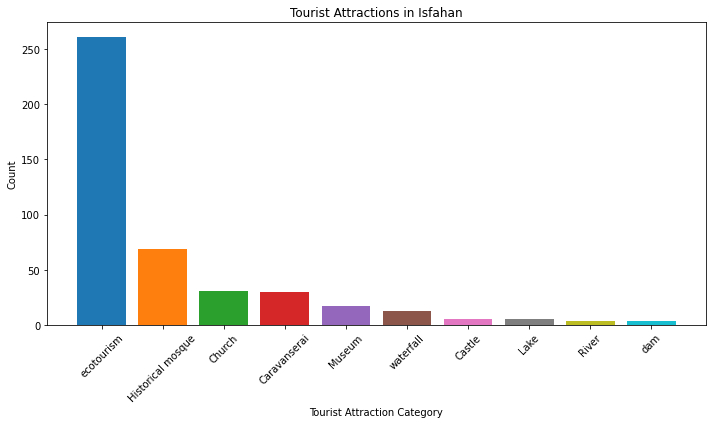

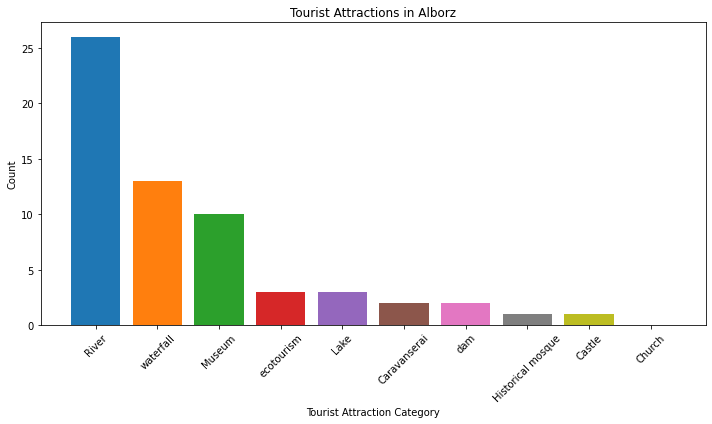

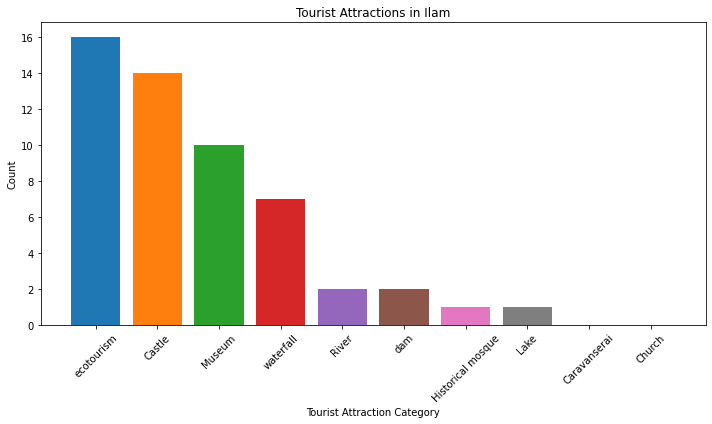

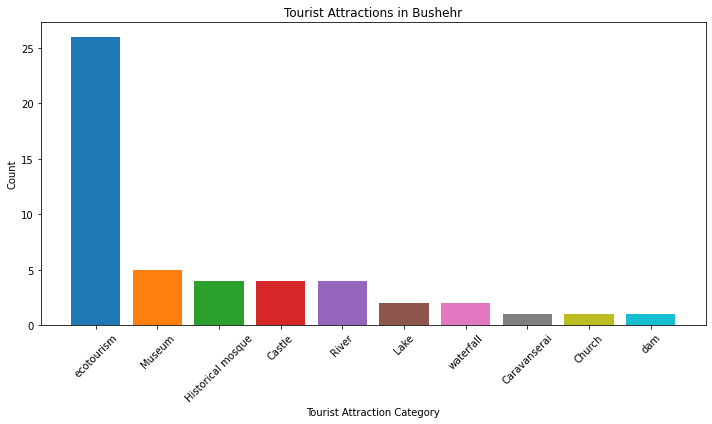

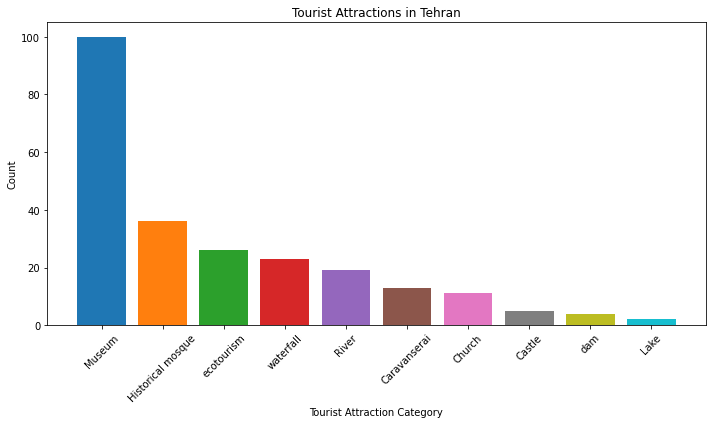

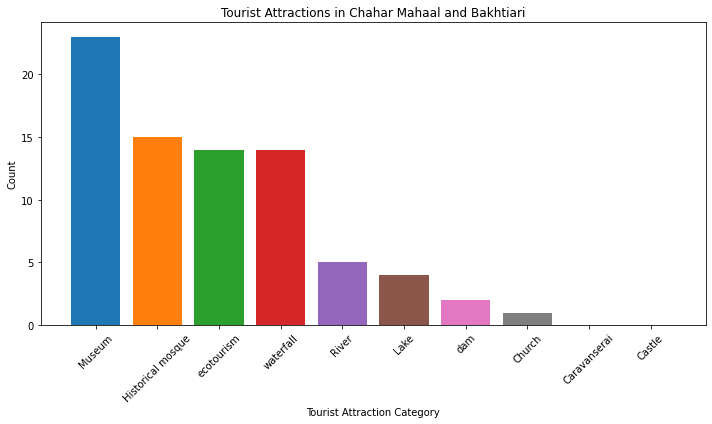

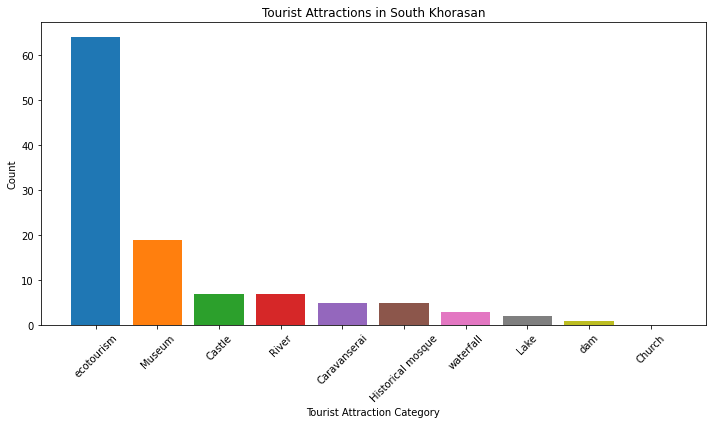

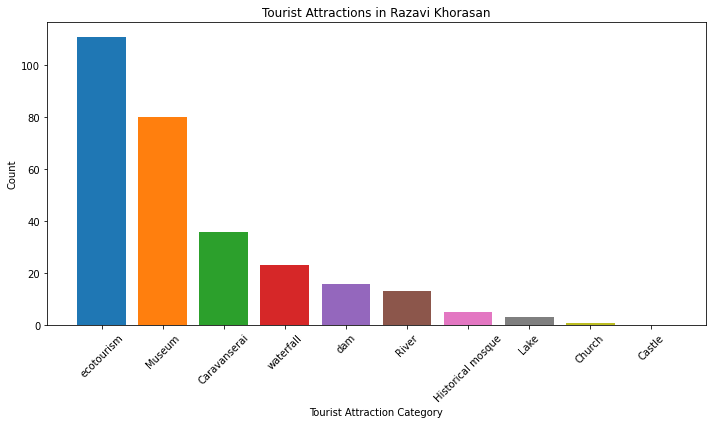

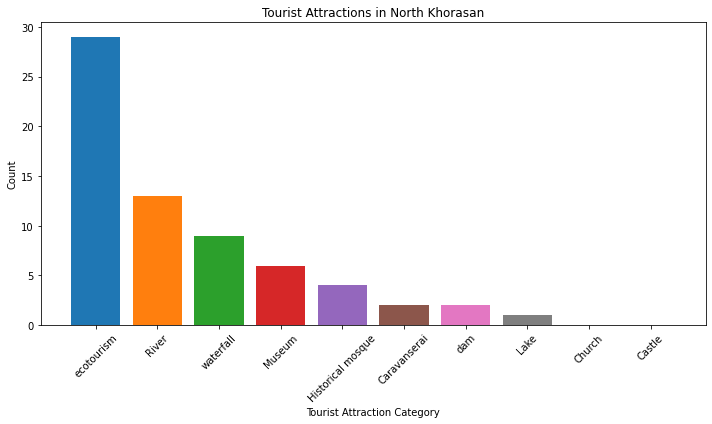

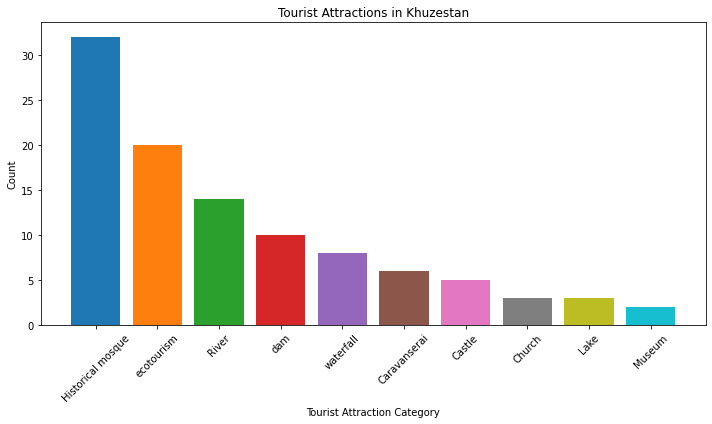

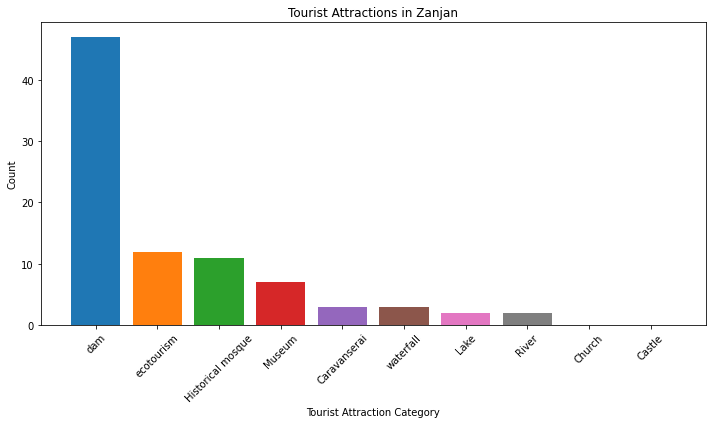

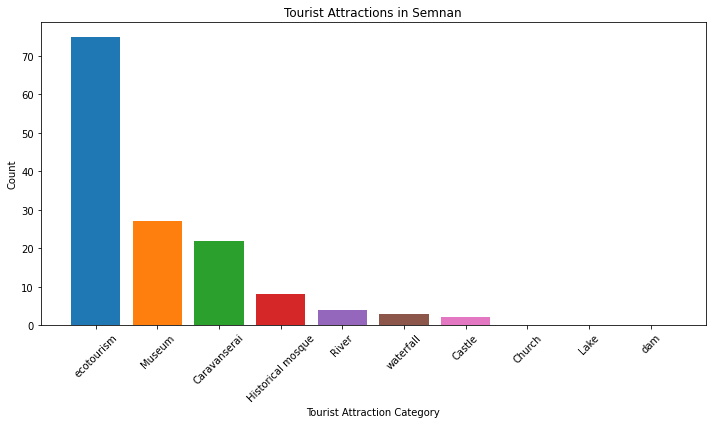

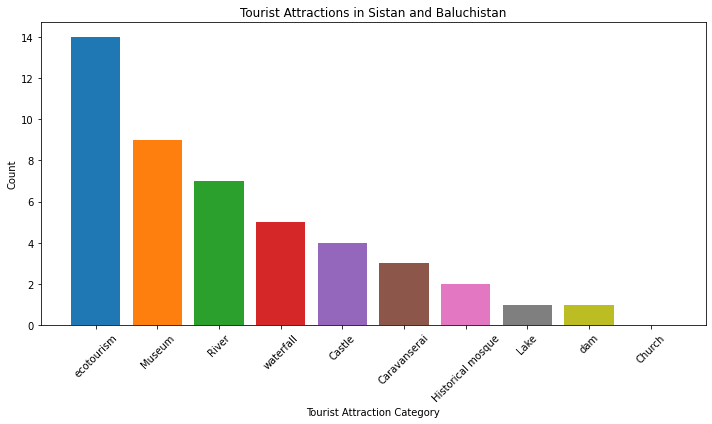

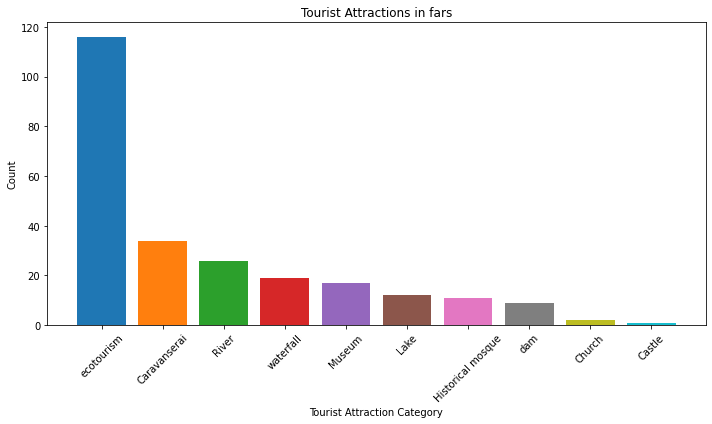

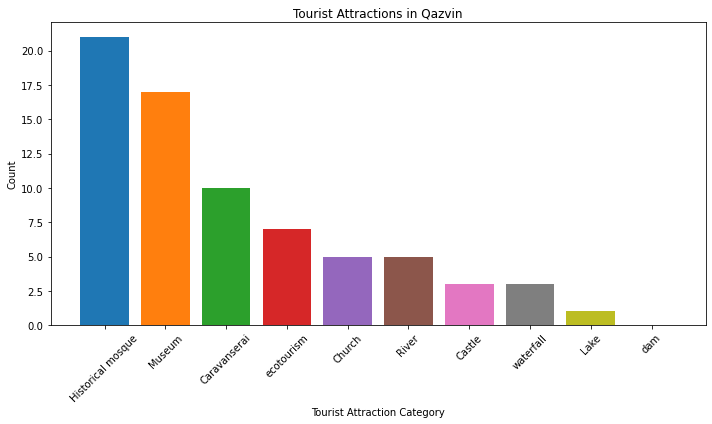

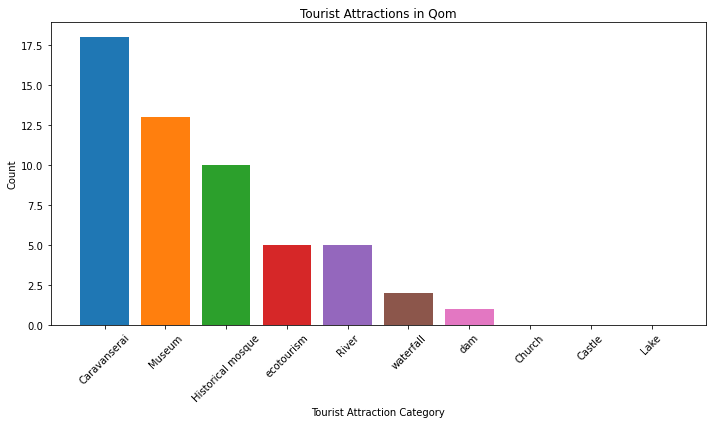

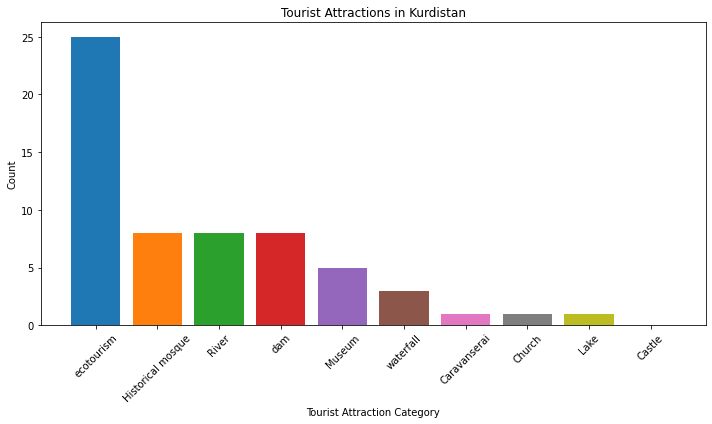

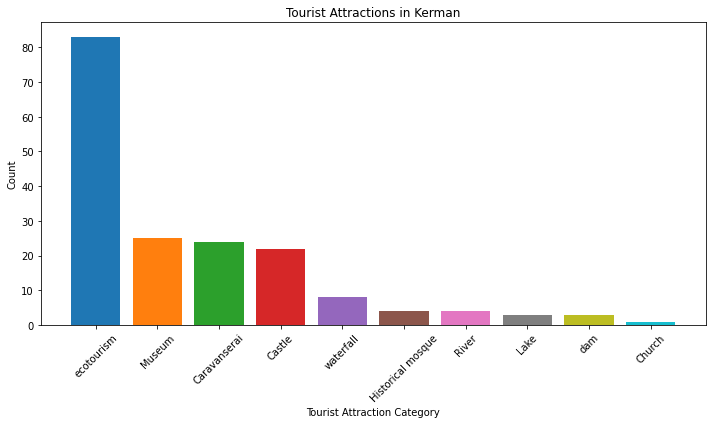

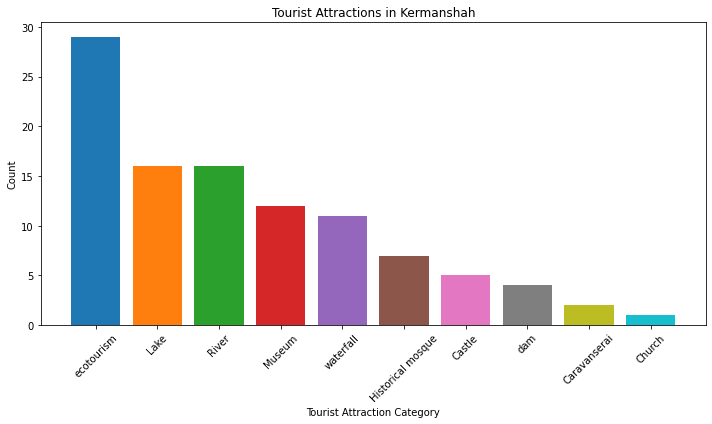

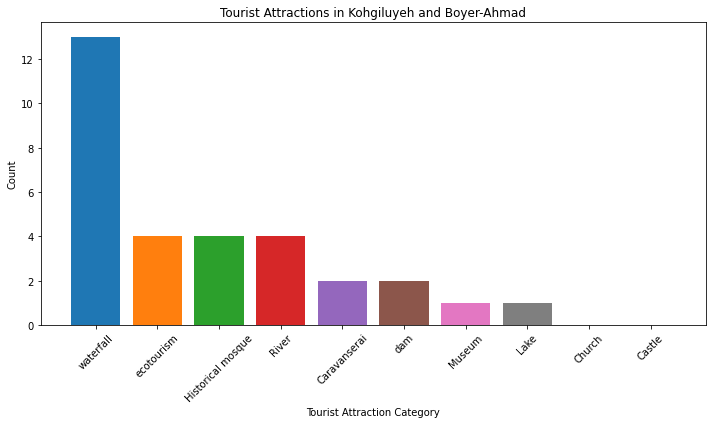

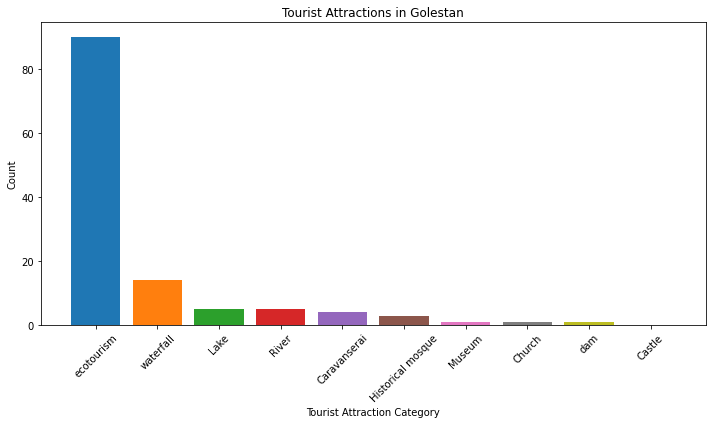

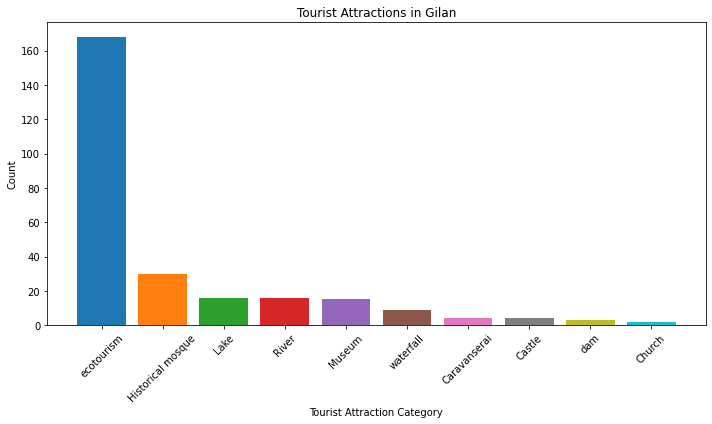

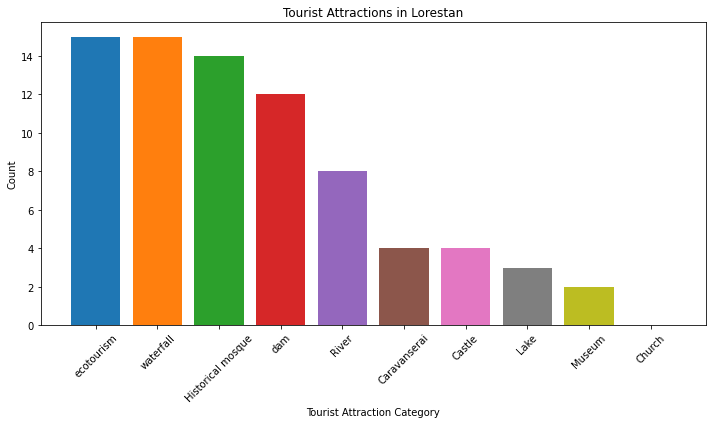

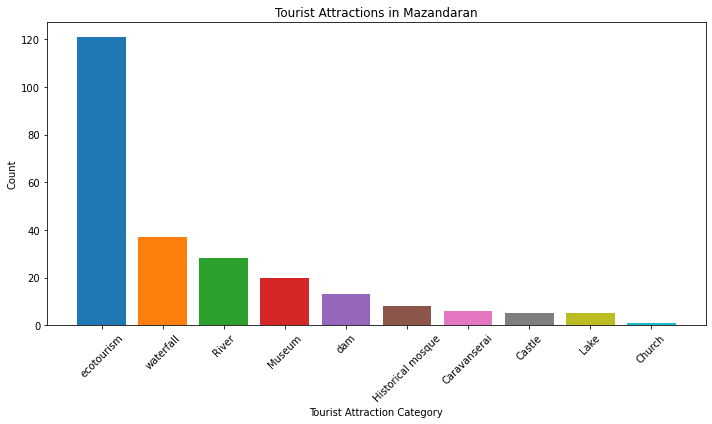

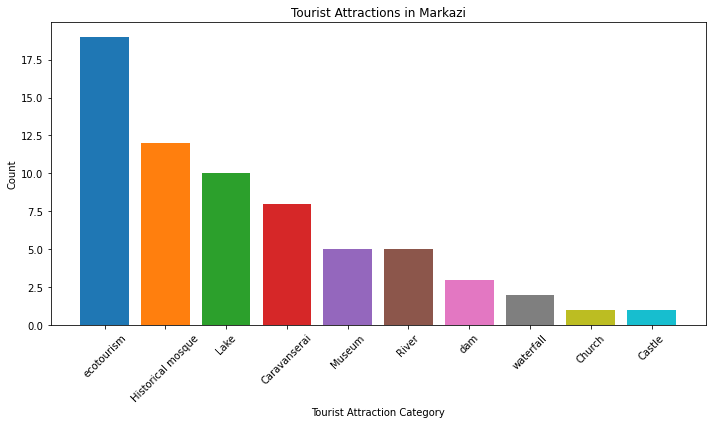

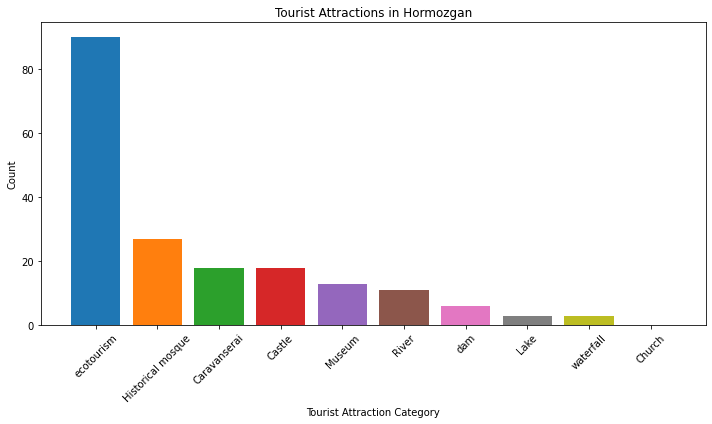

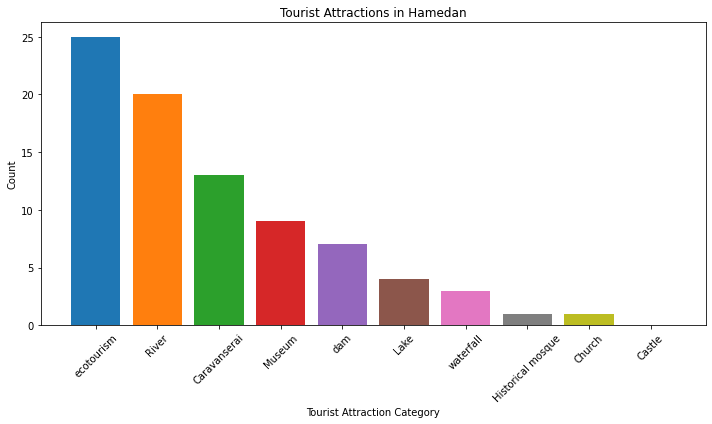

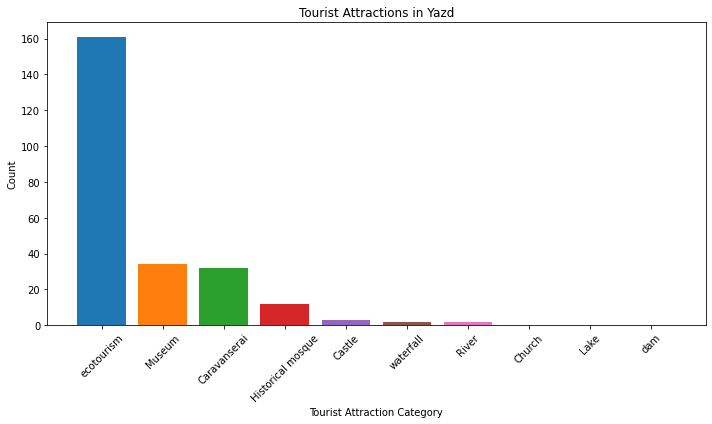

In [42]:
colors = plt.cm.tab10.colors

provinces = ds['province'].unique()

for province in provinces:
    province_data = ds[ds['province'] == province]

    counts = [province_data[category].sum() for category in attraction_categories]

    plot_data = pd.DataFrame({'Category': attraction_categories, 'Count': counts})

    plot_data = plot_data.sort_values(by='Count', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(plot_data['Category'], plot_data['Count'], color=colors[:len(attraction_categories)])
    plt.xlabel('Tourist Attraction Category')
    plt.ylabel('Count')
    plt.title(f'Tourist Attractions in {province}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# shp file format:

In [21]:
gdf.geometry

0     POLYGON ((1426023.555 1771886.186, 1425933.993...
1     POLYGON ((1173557.354 1798489.356, 1173774.665...
2     POLYGON ((1474716.949 1794914.133, 1474705.942...
3     POLYGON ((1754130.556 1202643.482, 1754609.247...
4     POLYGON ((1756780.363 1393671.118, 1760381.426...
5     POLYGON ((1248410.110 1177802.280, 1248602.024...
6     POLYGON ((1635424.525 746171.049, 1635644.630 ...
7     POLYGON ((1723565.719 1316059.602, 1732334.547...
8     POLYGON ((1590448.868 1024972.791, 1590653.997...
9     POLYGON ((2414168.690 1171884.196, 2414940.389...
10    POLYGON ((2620481.046 1224320.193, 2620750.921...
11    POLYGON ((2206563.432 1613151.330, 2206416.352...
12    POLYGON ((1466341.457 1053773.728, 1466834.086...
13    POLYGON ((1497096.673 1524016.723, 1496954.391...
14    POLYGON ((2160246.315 1519955.941, 2163975.514...
15    POLYGON ((2683956.405 890787.438, 2688413.231 ...
16    POLYGON ((1829598.939 894340.814, 1829837.453 ...
17    POLYGON ((1556180.261 1457127.961, 1556447

In [22]:
gdf.geometry.crs


<Projected CRS: PROJCS["lambert-Iran",GEOGCS["WGS 84",DATUM["WGS_1 ...>
Name: lambert-Iran
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Average number of tourists in each province (On Map):

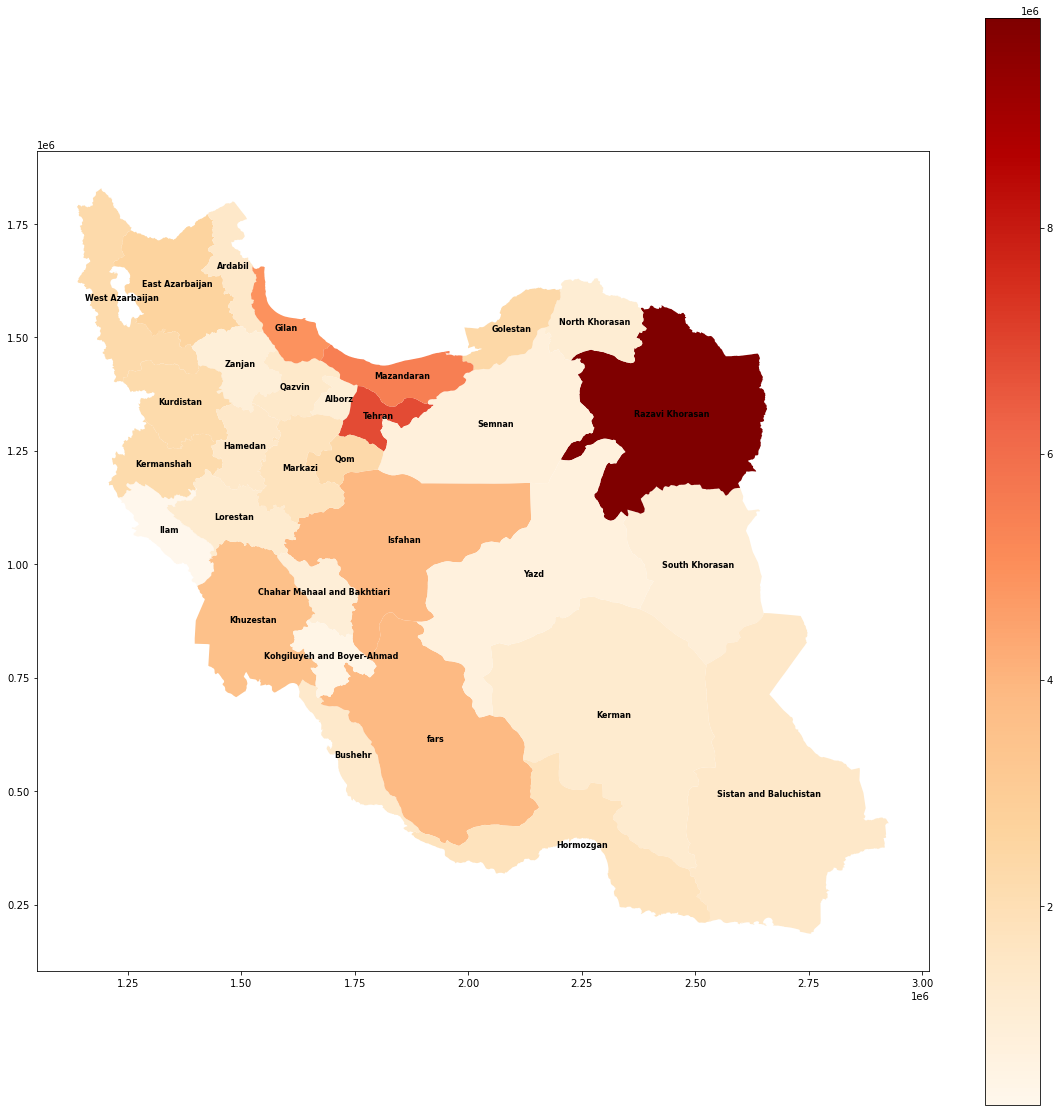

In [69]:

shp = gpd.read_file('/home/amirali/Downloads/Iran/iran.shp')
shp = shp.rename(columns={"Name_12_13": "ostan"})
shp = shp[["ostan", "geometry"]]
merged_data = ds.merge(shp, left_on="province", right_on="ostan")
merged_data = merged_data.drop(["ostan"], axis=1)
plot_data = merged_data[["province","Avg", "geometry"]]
gdf = gpd.GeoDataFrame(data=plot_data, geometry="geometry")

gdf.plot(figsize=(20,20), column="Avg", cmap='OrRd', legend=True)


for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['province']):
    plt.text(x, y, label, fontsize=8, ha='center', va='center', color='black', weight='bold')

    
plt.show()

# Compare Average number of tourists of each provinces with average:

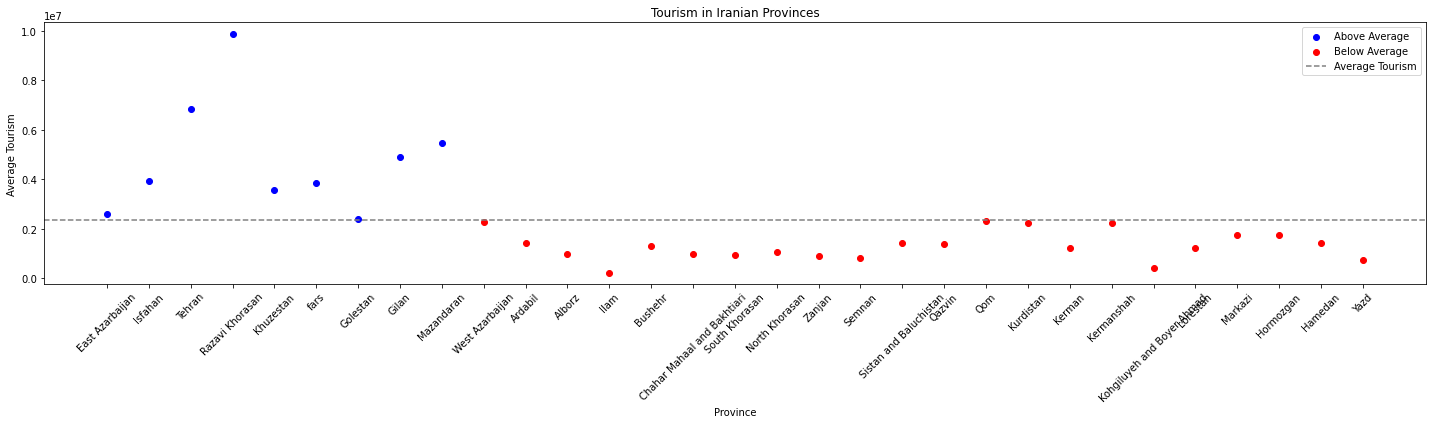

In [26]:

average_tourism = ds['Avg'].mean()

above_average = ds[ds['Avg'] > average_tourism]
below_average = ds[ds['Avg'] < average_tourism]

plt.figure(figsize=(20, 6))

plt.scatter(above_average['province'], above_average['Avg'], color='blue', label='Above Average')

plt.scatter(below_average['province'], below_average['Avg'], color='red', label='Below Average')

plt.axhline(y=average_tourism, color='gray', linestyle='--', label='Average Tourism')

plt.xlabel('Province')
plt.ylabel('Average Tourism')
plt.title('Tourism in Iranian Provinces')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()

plt.show()


# Tourism attractions of the country provinces (On Map): 

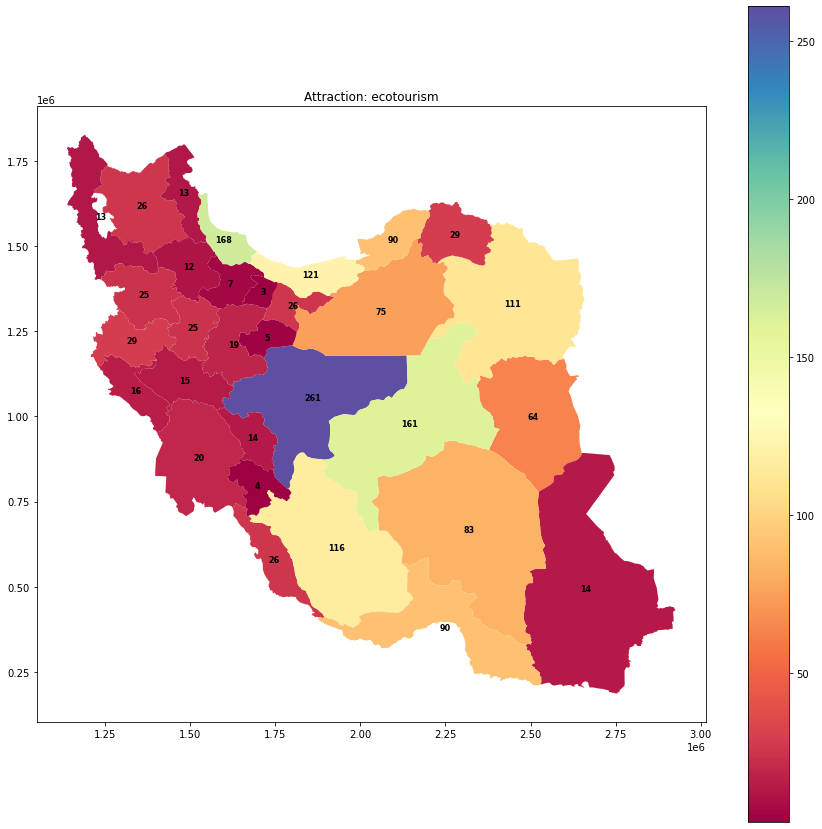

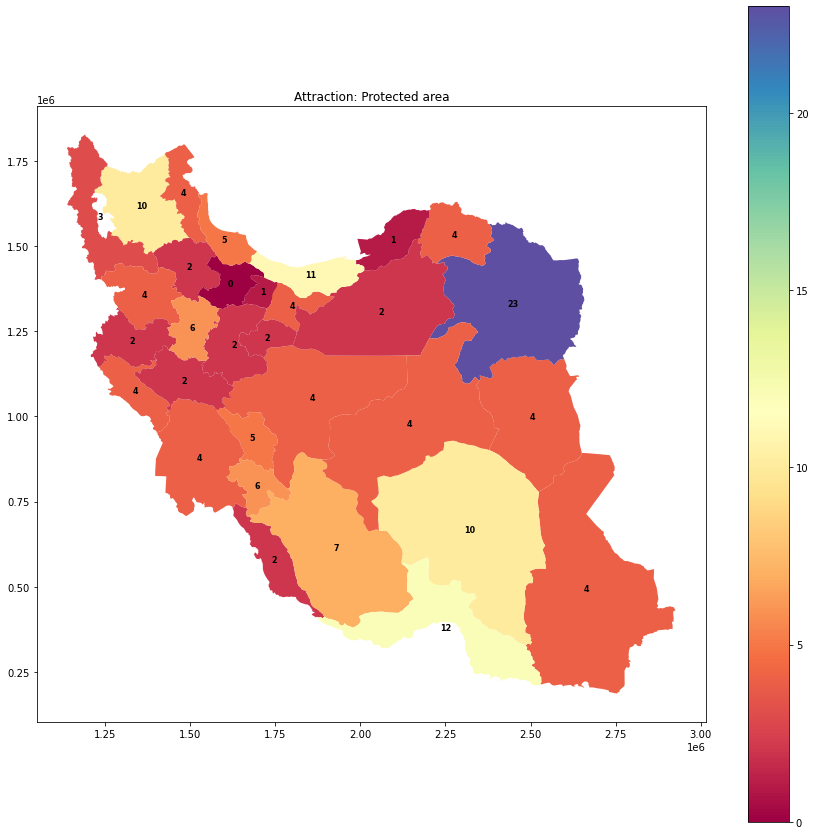

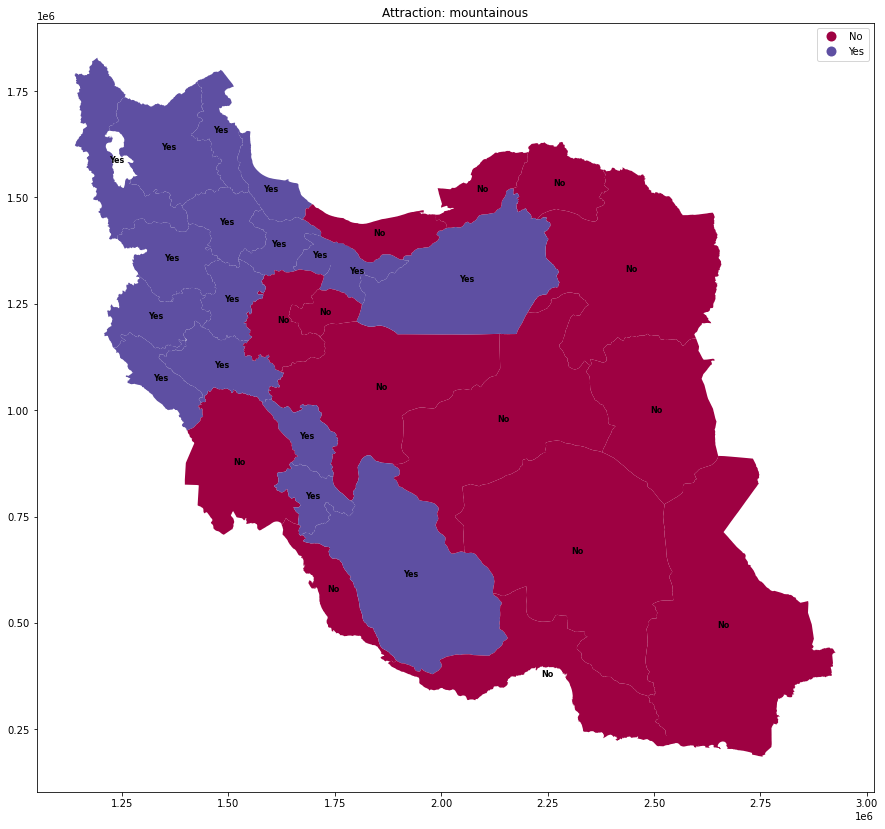

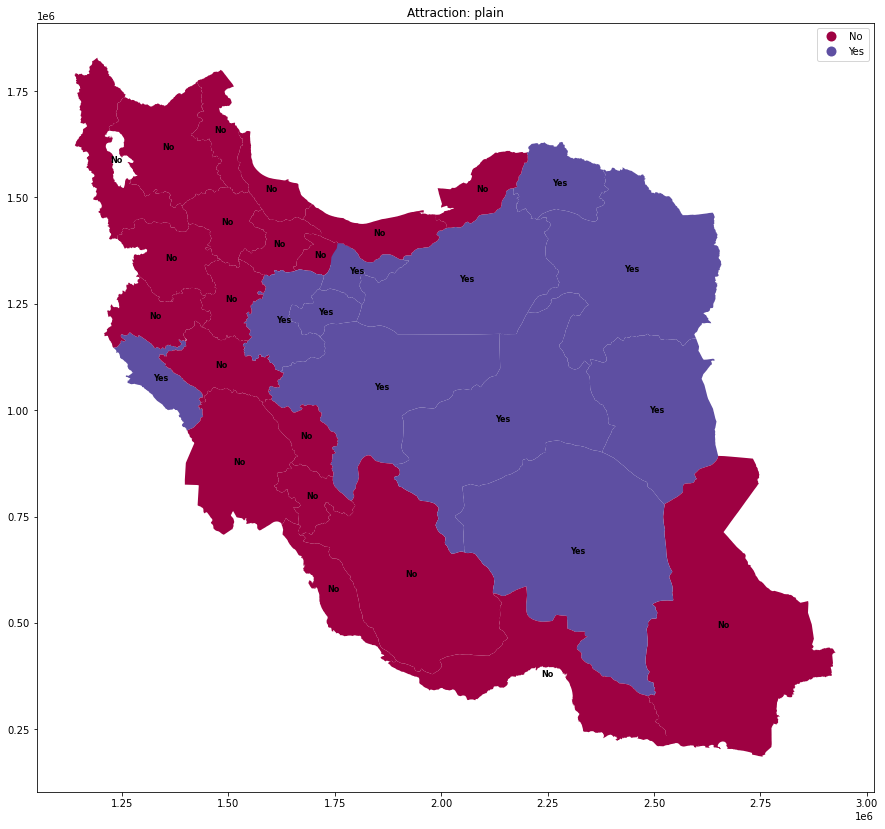

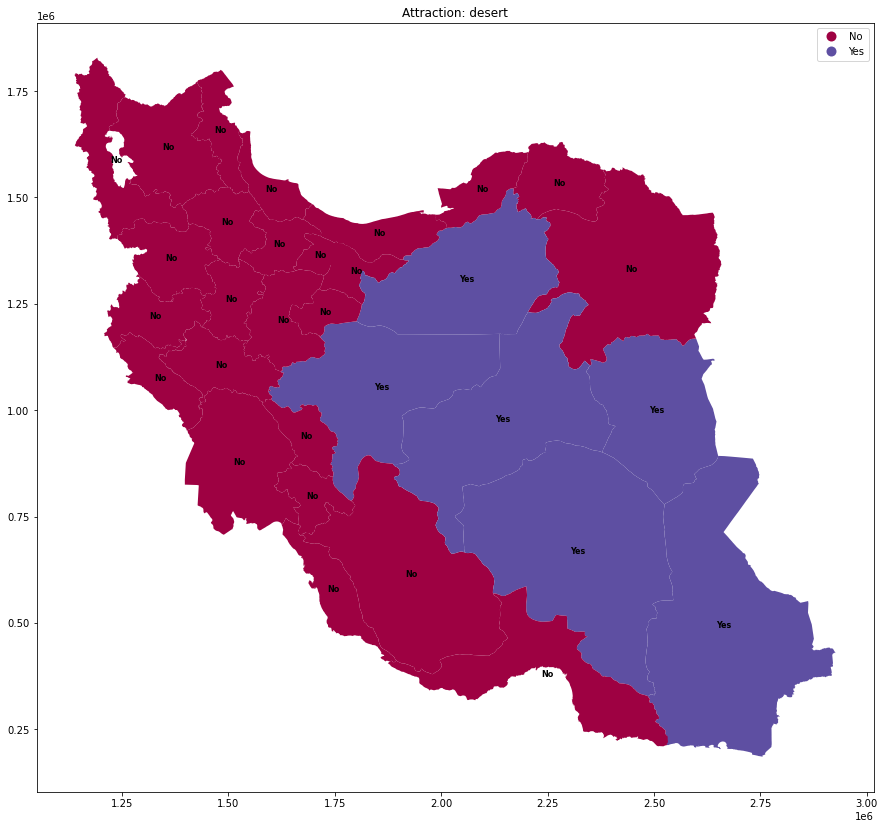

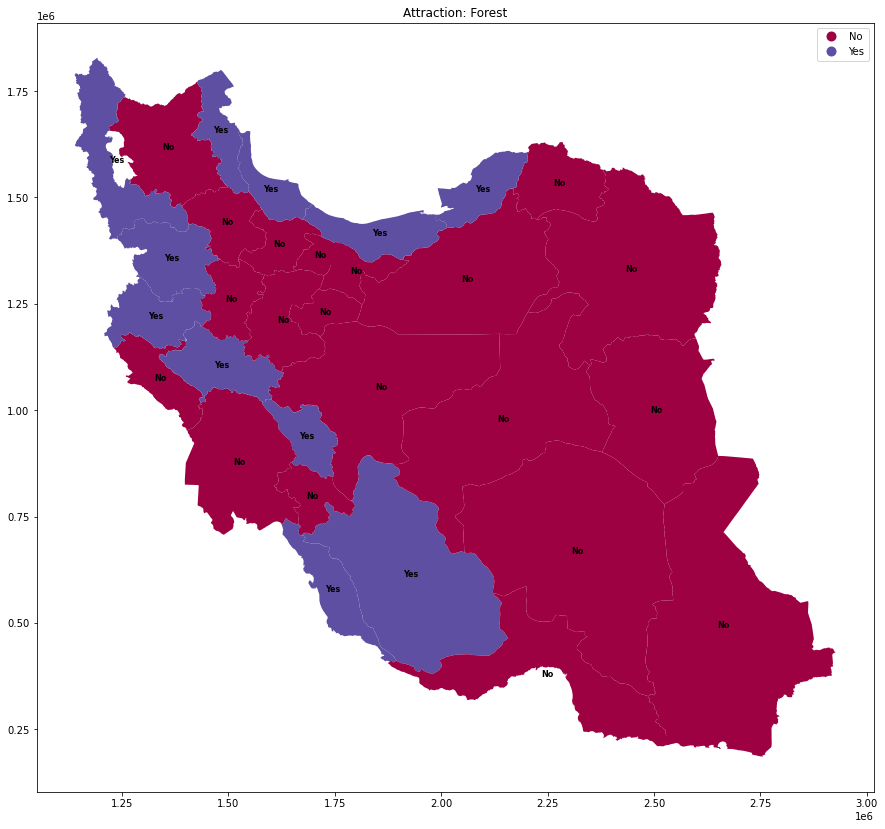

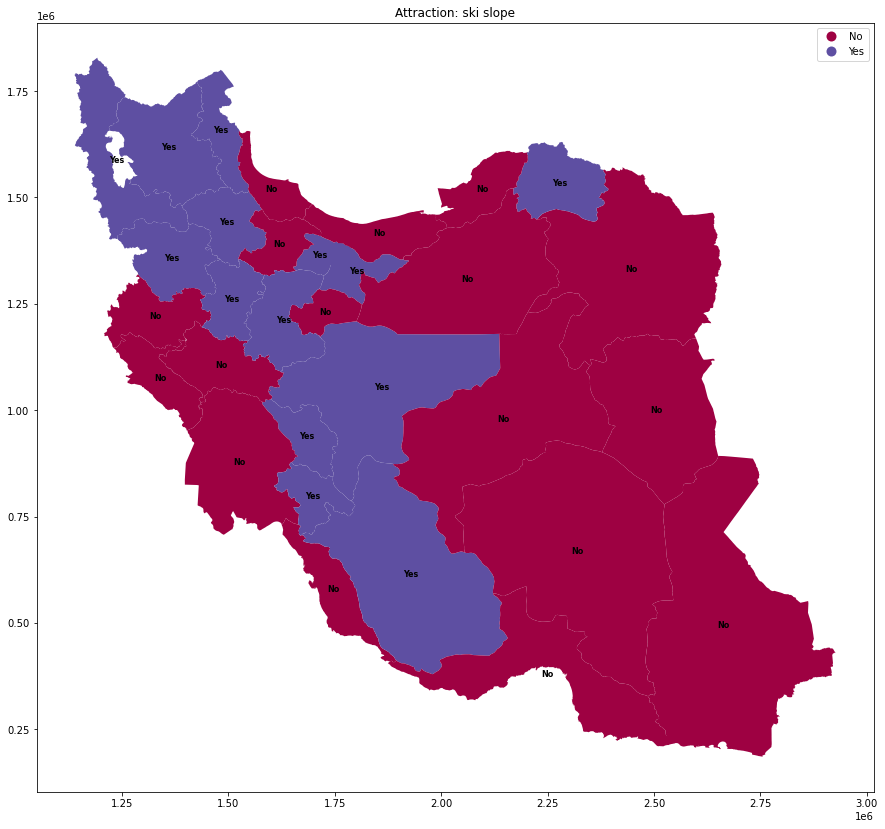

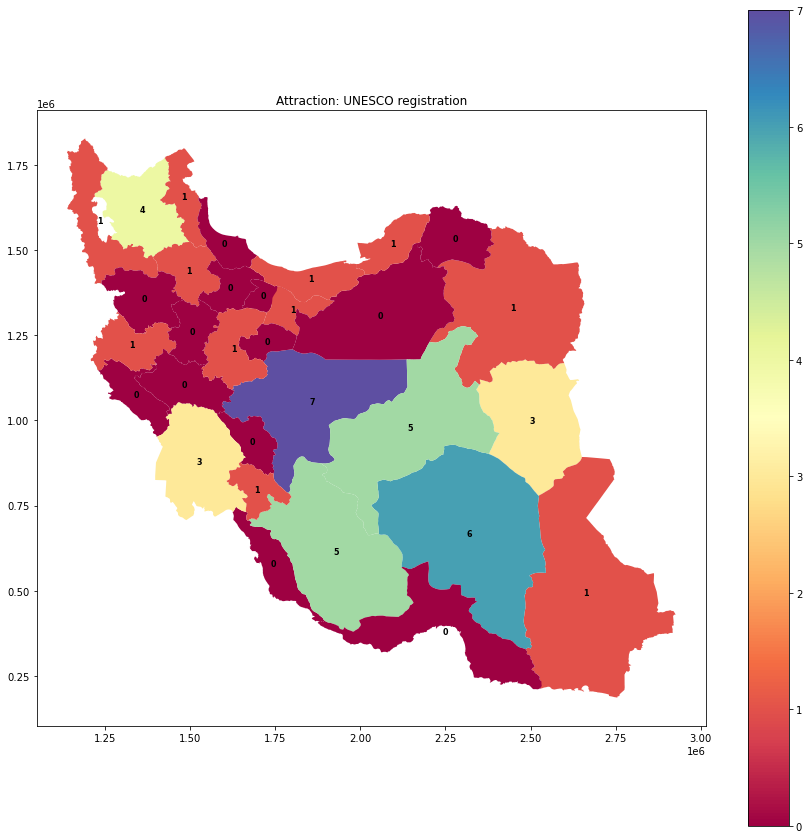

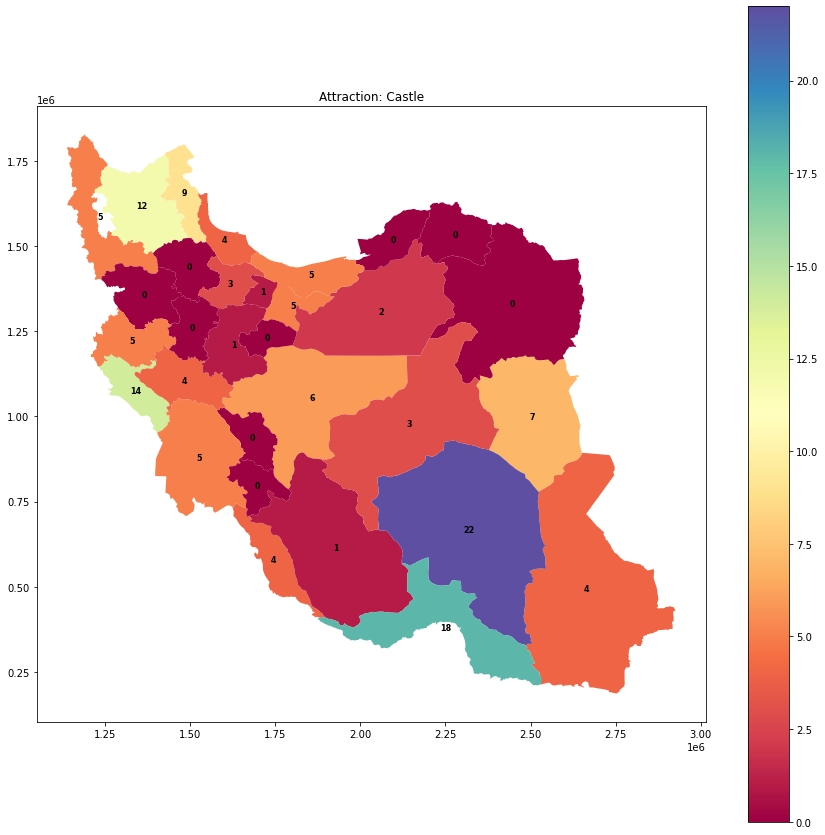

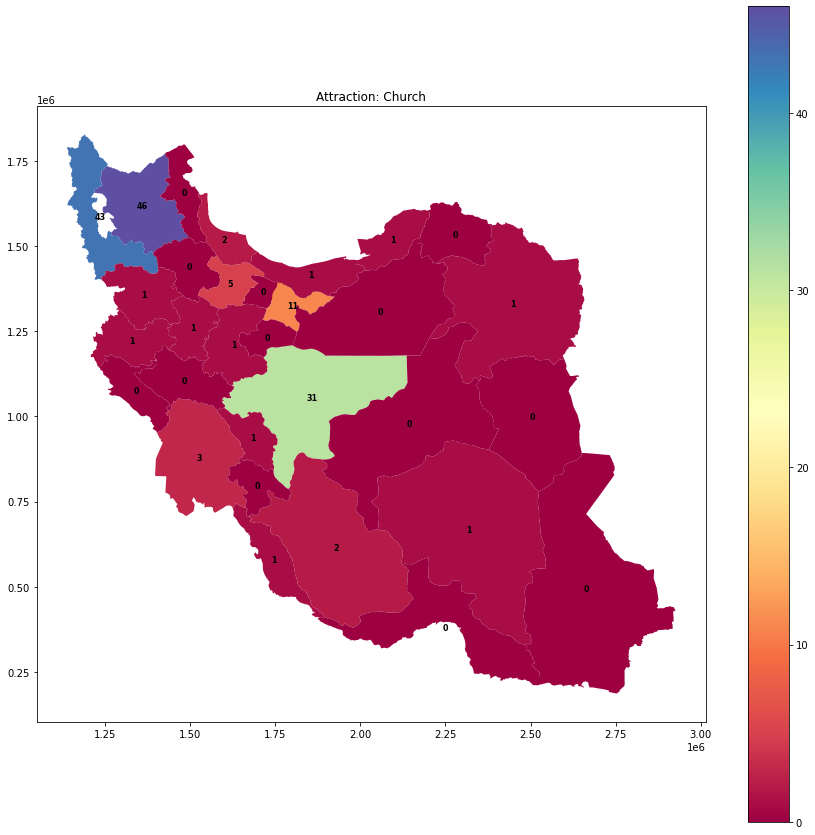

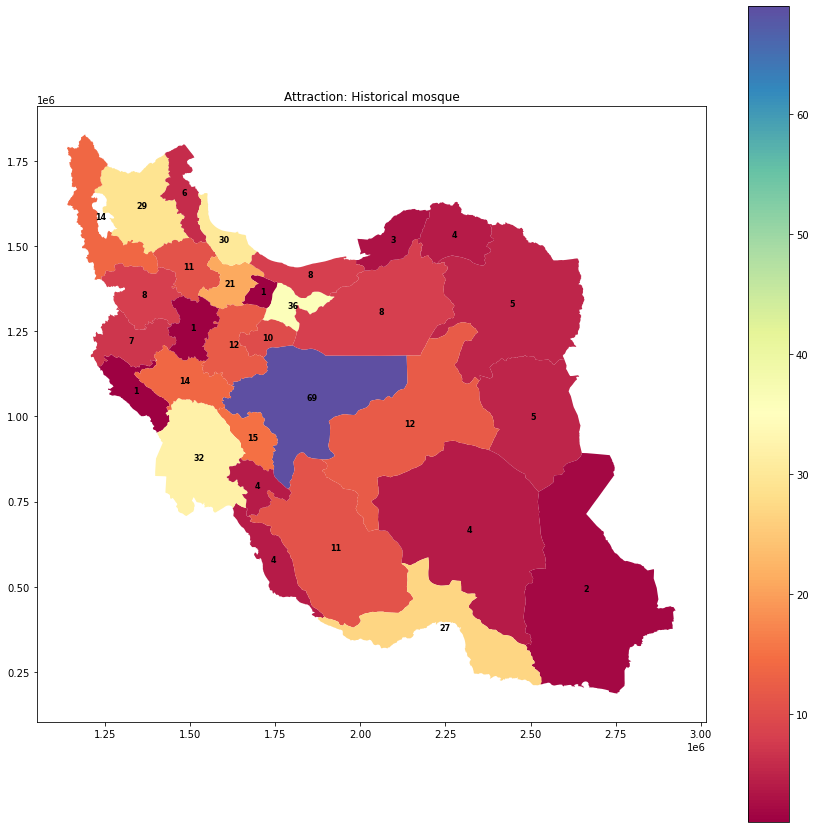

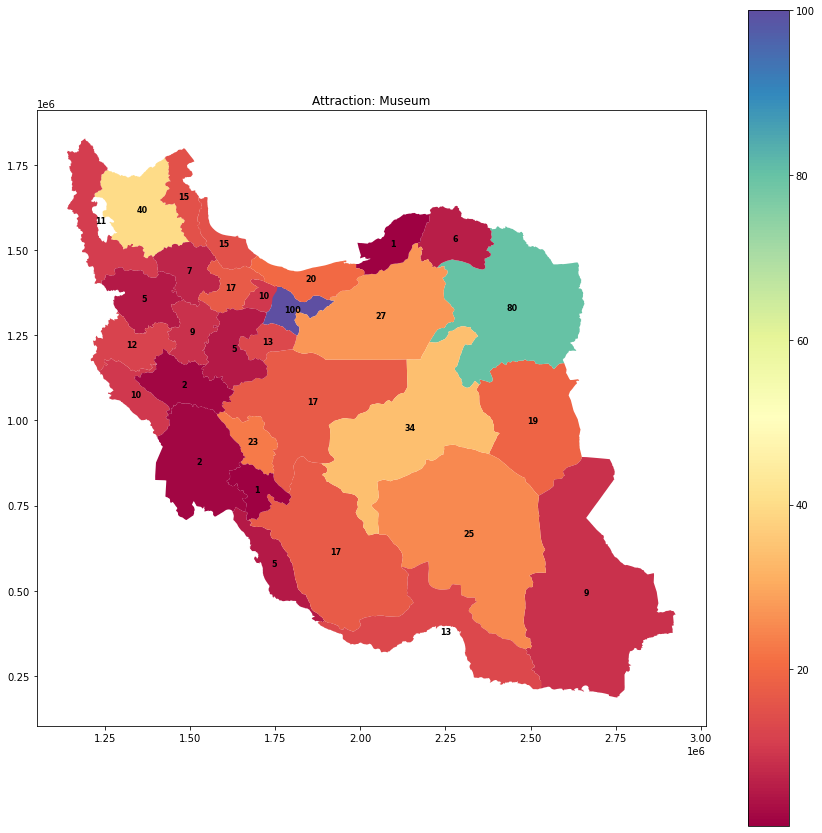

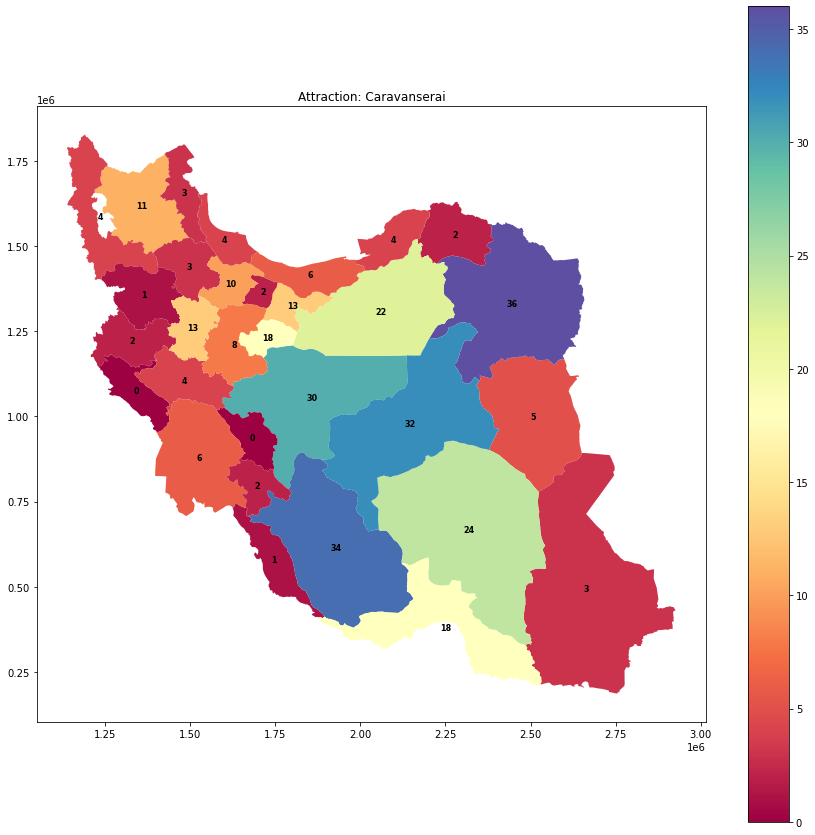

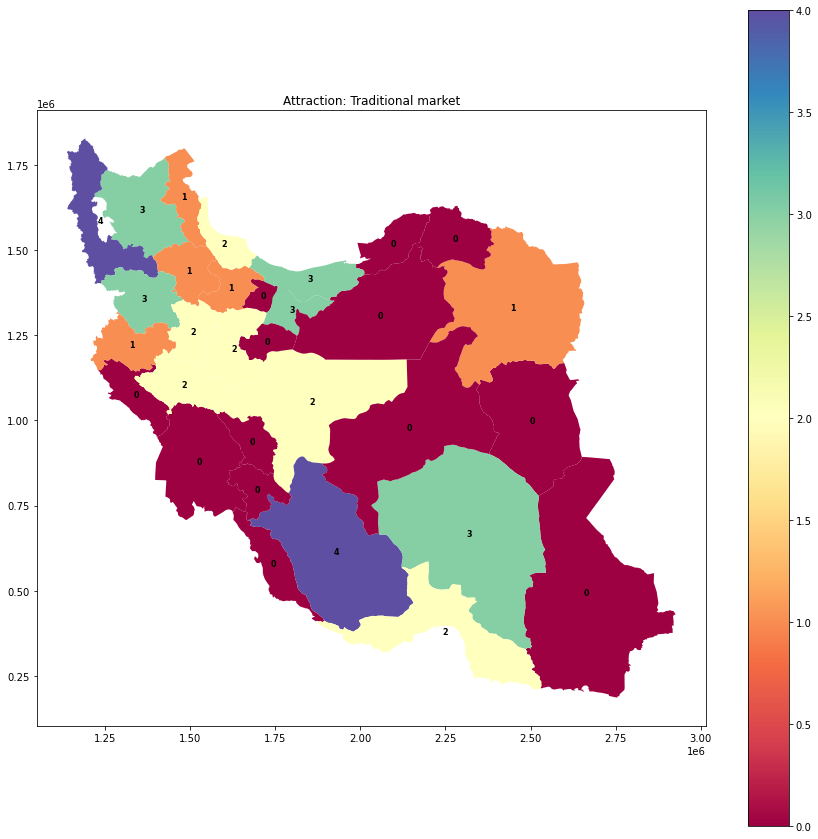

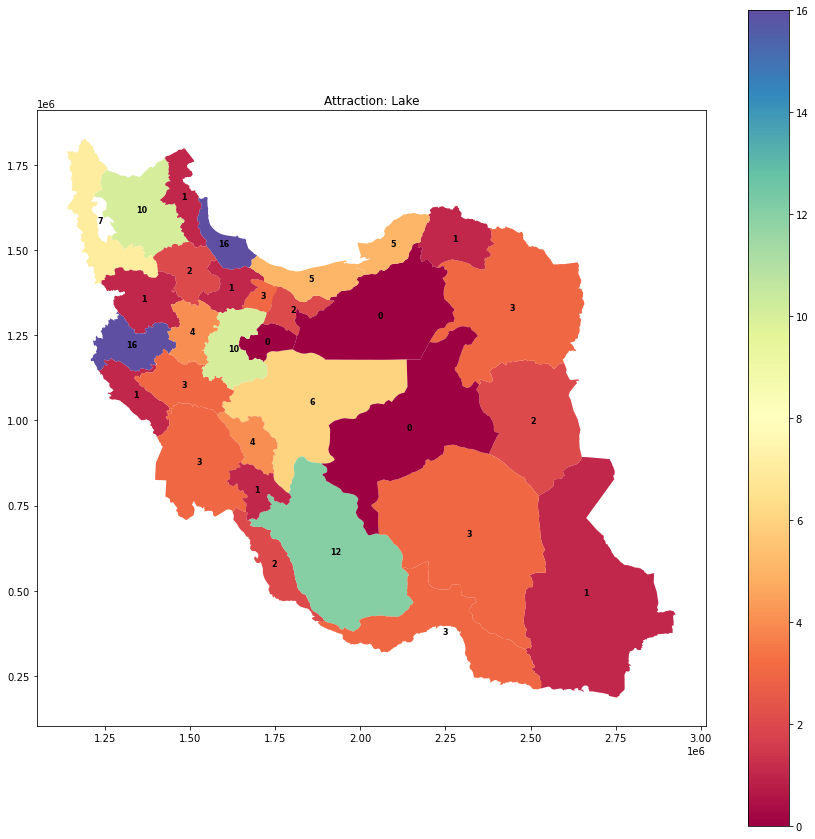

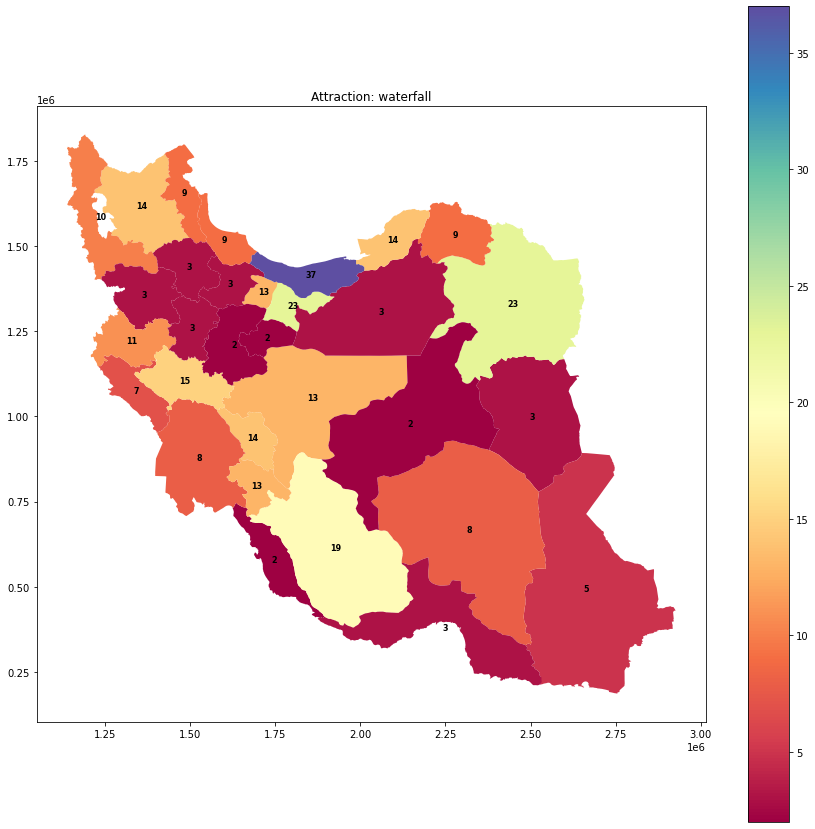

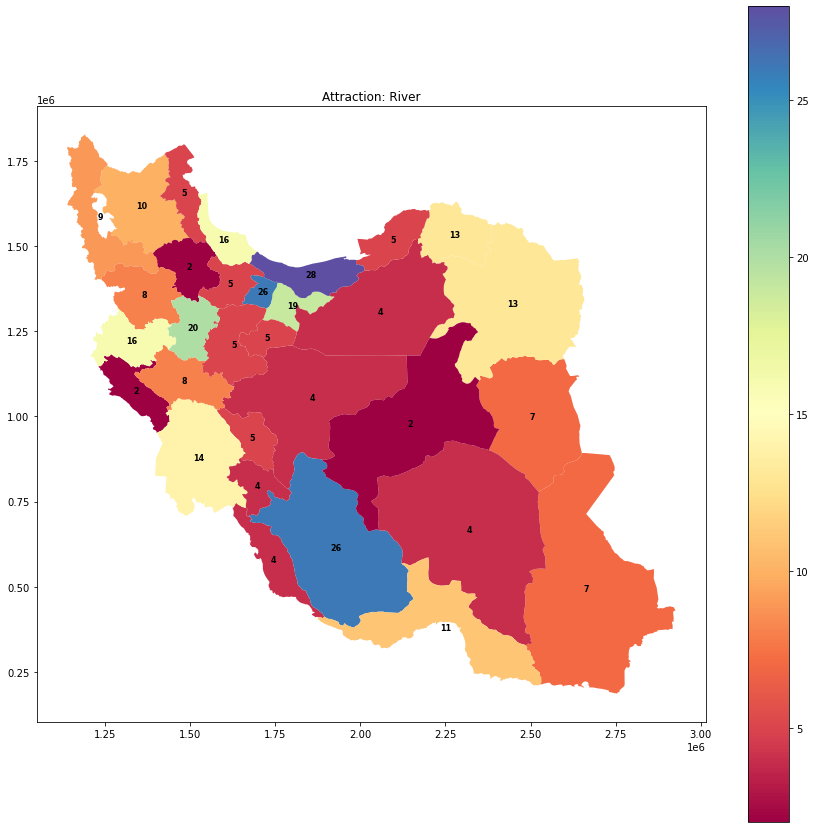

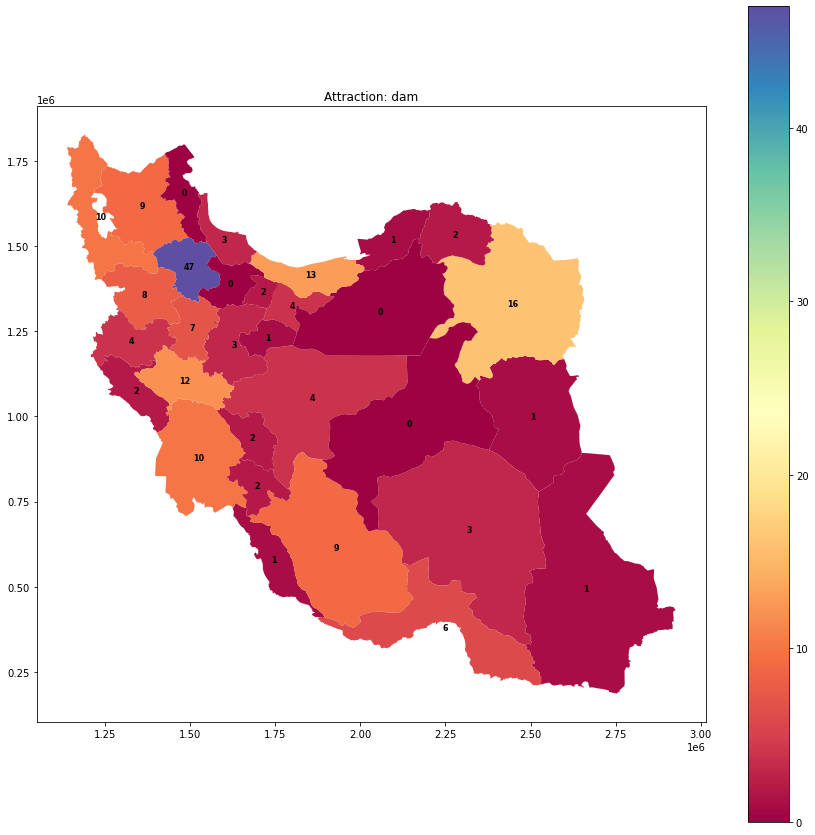

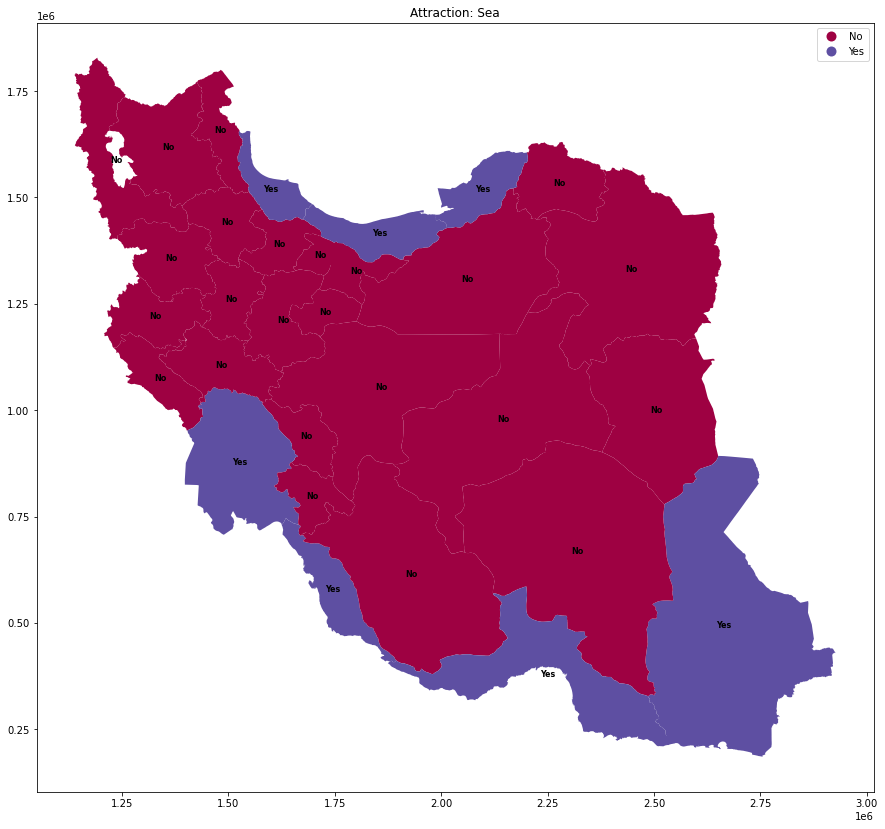

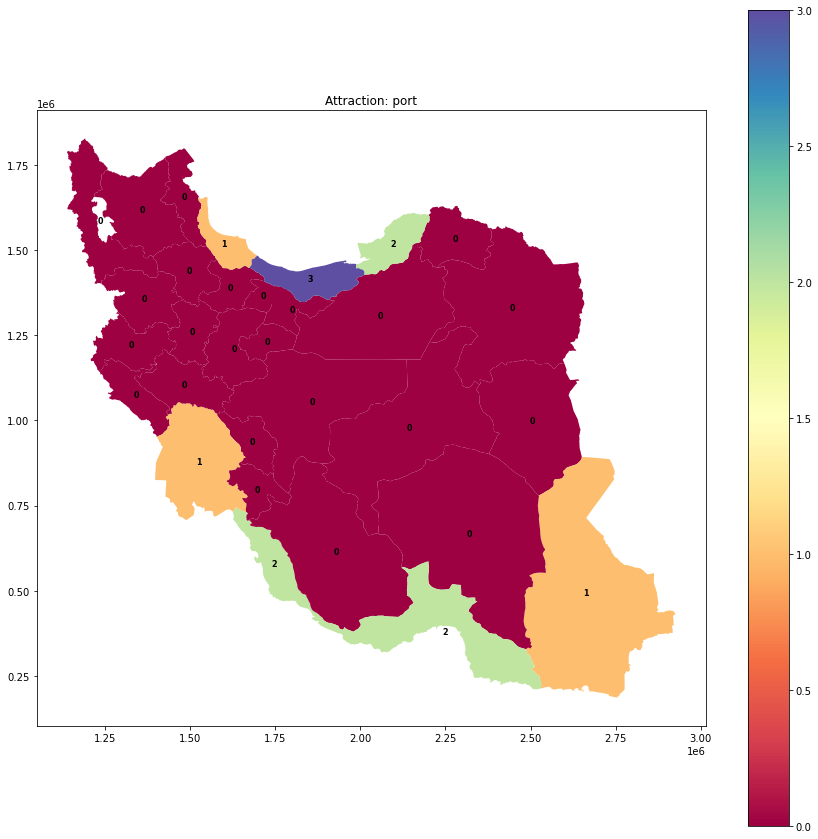

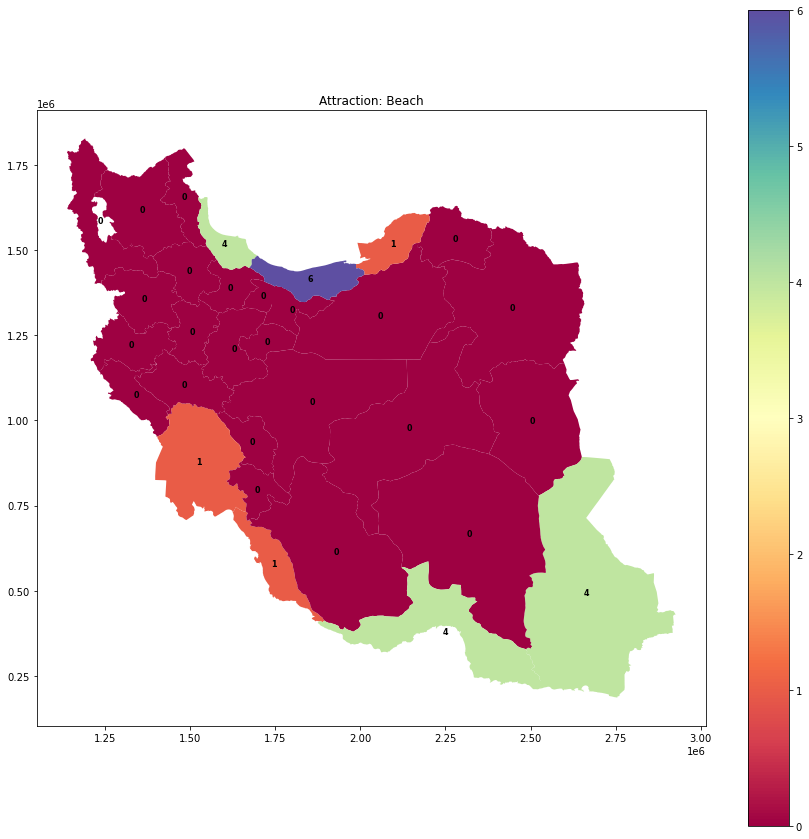

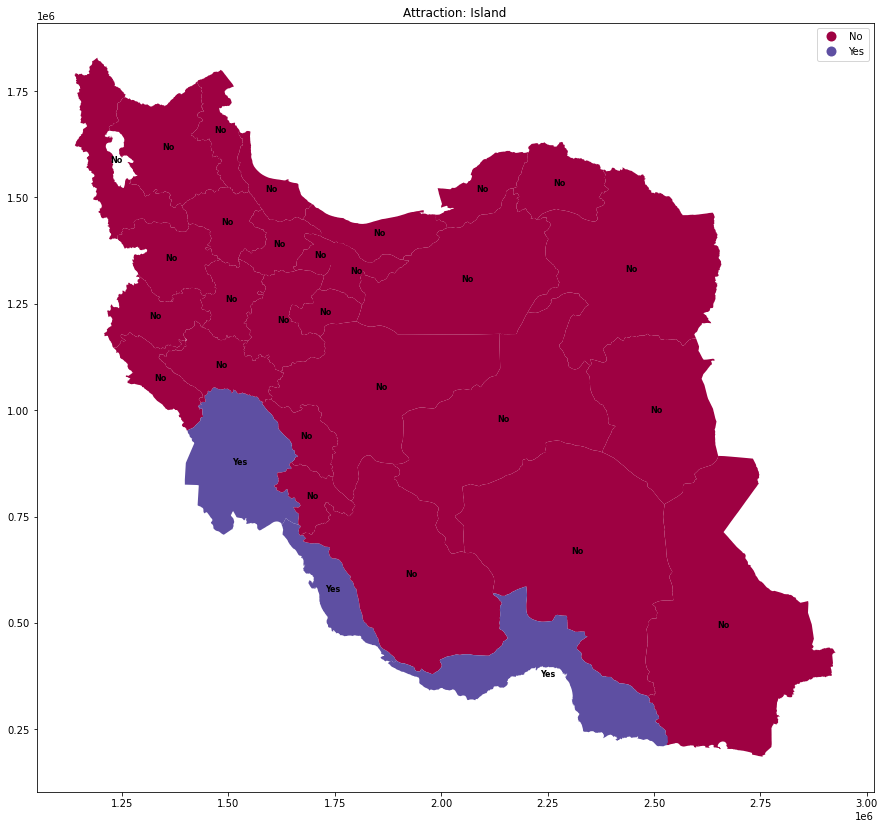

In [101]:
plot_data = merged_data[["geometry", "province"] + tourism_factors]

gdf = gpd.GeoDataFrame(data=plot_data, geometry="geometry")

for attraction in tourism_factors:
    ax = gdf.plot(figsize=(15,15), column=attraction, cmap='Spectral', legend=True)
 
    for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf[attraction]):
        plt.text(x, y, label, fontsize=8, ha='center', va='center', color='black', weight='bold')
    
    plt.title(f'Attraction: {attraction}')
    plt.show()


# Try to model the factors:

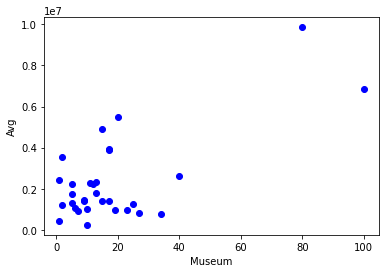

In [31]:
plt.scatter(X.Museum, X.Avg,  color='blue')
plt.xlabel("Museum")
plt.ylabel("Avg")
plt.show()

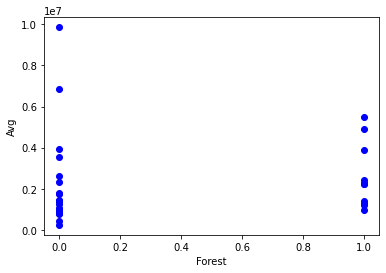

In [32]:
plt.scatter(X.Forest, X.Avg,  color='blue')
plt.xlabel("Forest")
plt.ylabel("Avg")
plt.show()

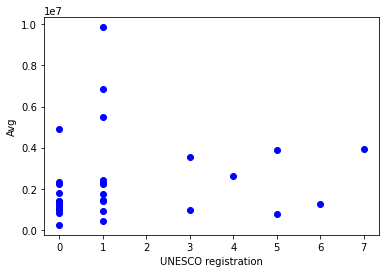

In [33]:
plt.scatter(X['UNESCO registration'], X['Avg'], color='blue')
plt.xlabel("UNESCO registration")
plt.ylabel("Avg")
plt.show()


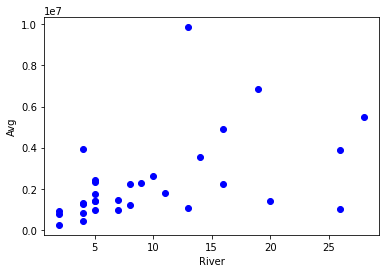

In [34]:
plt.scatter(X.River, X.Avg,  color='blue')
plt.xlabel("River")
plt.ylabel("Avg")
plt.show()

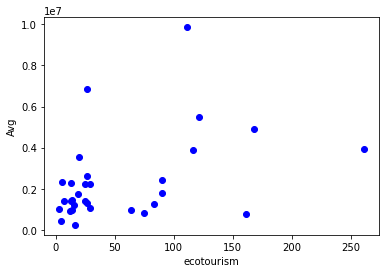

In [35]:
plt.scatter(X.ecotourism, X.Avg,  color='blue')
plt.xlabel("ecotourism")
plt.ylabel("Avg")
plt.show()

There is no linear relationship between factors and average tourism in each province.

In [36]:

ds = ds.drop(['2015 - 2018', '2019 - 2021'], axis=1)

correlation = ds.iloc[:, 3:-3].corrwith(ds['Avg'])

sorted_factors = correlation.abs().sort_values(ascending=False)


print(sorted_factors)


Museum                 0.685369

waterfall              0.655228

Protected area         0.627057

Flight site            0.559153

River                  0.476494

Caravanserai           0.422450

ecotourism             0.409002

Traditional market     0.379525

Historical mosque      0.344274

Lake                   0.283738

Beach                  0.241530

desert                 0.197314

dam                    0.191432

port                   0.184540

Sea                    0.169325

mountainous            0.160701

Church                 0.160663

plain                  0.131689

Castle                 0.115070

UNESCO registration    0.113269

Forest                 0.084906

dtype: float64


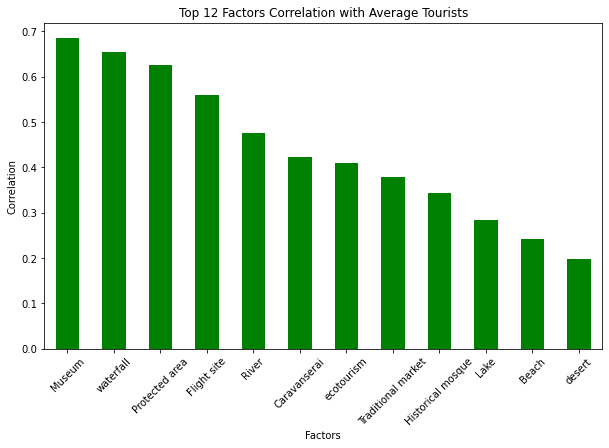

In [37]:

N = 12
top_factors = sorted_factors.head(N)

plt.figure(figsize=(10, 6))
top_factors.plot(kind='bar', color='green')
plt.title(f'Top {N} Factors Correlation with Average Tourists')
plt.xlabel('Factors')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()


# Why we can not model the factors?!:

as you can see there is no linear or even nonlinear relationship between each factor and the average number of tourists, the reason is that the given data set (CSV  file ) only contains a number of each tourist attraction and doesn't have the rating or other helpful data that help us to model it, for example, Persepolis museum and a very simple local museum with not strong work have the same value in our data set, but in reality, there is a much difference in attract the tourist between these two types of museum; if we had the number of each tourist attractions for each of them it would more be helpful. or some other factors that are affecting religious destinations like Khorasan Razavi which has the most tourists in the country in this data we don't have enough info about these types. 
finally, with this volume of data, we can not model which factor has more effect on attracting tourists to each province.

# Resource:

 * Real data collected from cultural heritage organization, statistics organization and tourism dataset of each province.

 * https://www.kaggle.com/datasets/saeedrostami1989/teravel-tourism-and-tourist-in-iran
 * https://gissha.ir/data/provinces/  آکادمی علوم مکانی ایران  for shp file.
 
Thanks to Mehdi Habibian for his guidance.